# Problem Statement
#### To predict whether a patient admitted into the hospital would survive or not.

Since we are to predict whether a patient admitted into the hospital would survive or not, the problem at hand is a classification task. We can make some assumptions regarding the factors that could affect whether a patient survives or not.

# Assumptions:
* Major reason for hospital deaths can be due to accident emergency cases.
* Pre-existing illness can aid the death of a patient in hospital.
* Variations in BMI can affect the survival of a patient.

Now that we have made our assumptions, lets load the libraries and the data.

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 200)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Loading datasets

For this dataset, we have a data dictionary. Lets load the data dictionary into a dataframe and create a function to access the information in the data dictionary.

### Loading data dictionary

In [2]:
datadict = pd.read_csv('../data/Data Dictionary.csv')

In [3]:
print("Data dictionary shape: ",datadict.shape)
datadict.head()

Data dictionary shape:  (188, 6)


Category   Variable Name Unit of Measure Data Type  \
0   identifier    encounter_id            None   integer   
1   identifier     hospital_id            None   integer   
2   identifier      patient_id            None   integer   
3  demographic  hospital_death            None    binary   
4  demographic             age           Years   numeric   

                                         Description Example  
0  Unique identifier associated with a patient un...    None  
1       Unique identifier associated with a hospital    None  
2        Unique identifier associated with a patient    None  
3  Whether the patient died during this hospitali...       0  
4           The age of the patient on unit admission    None

### Creating a function to access data dictionary values

In [4]:
def view_datadict(feat, v: str='Description', showidx: bool=False, showcols: bool=False):
    tempdict = datadict.set_index(datadict['Variable Name']).drop('Variable Name', axis=1).T
    unit = tempdict.loc["Unit of Measure", feat]
    if showidx:
        print(tempdict.index)
    if showcols:
        print(tempdict.columns)
    return f"{tempdict.loc[v, feat]} in unit: {unit}"

In [5]:
# testing the function
view_datadict('age')

'The age of the patient on unit admission in unit: Years'

### Loading dataset

In [6]:
# loading dataset
dataset = pd.read_csv('../data/Dataset.csv')
print("Dataset shape: ", dataset.shape)
dataset.head()

Dataset shape:  (91713, 186)


encounter_id  patient_id  hospital_id  hospital_death   age    bmi  \
0         66154       25312          118               0  68.0  22.73   
1        114252       59342           81               0  77.0  27.42   
2        119783       50777          118               0  25.0  31.95   
3         79267       46918          118               0  81.0  22.64   
4         92056       34377           33               0  19.0    NaN   

   elective_surgery  ethnicity gender  height hospital_admit_source  \
0                 0  Caucasian      M   180.3                 Floor   
1                 0  Caucasian      F   160.0                 Floor   
2                 0  Caucasian      F   172.7  Emergency Department   
3                 1  Caucasian      F   165.1        Operating Room   
4                 0  Caucasian      M   188.0                   NaN   

            icu_admit_source  icu_id icu_stay_type      icu_type  \
0                      Floor      92         admit         CTICU   
1                      Floor      90         admit  Med-Surg ICU   
2       Accident & Emergency      93         admit  Med-Surg ICU   
3  Operating Room / Recovery      92         admit         CTICU   
4       Accident & Emergency      91         admit  Med-Surg ICU   

   pre_icu_los_days  readmission_status  weight  albumin_apache  \
0          0.541667                   0    73.9             2.3   
1          0.927778                   0    70.2             NaN   
2          0.000694                   0    95.3             NaN   
3          0.000694                   0    61.7             NaN   
4          0.073611                   0     NaN             NaN   

   apache_2_diagnosis  apache_3j_diagnosis  apache_post_operative  arf_apache  \
0               113.0               502.01                      0         0.0   
1               108.0               203.01                      0         0.0   
2               122.0               703.03                      0         0.0   
3               203.0              1206.03                      1         0.0   
4               119.0               601.01                      0         0.0   

   bilirubin_apache  bun_apache  creatinine_apache  fio2_apache  \
0               0.4        31.0               2.51          NaN   
1               NaN         9.0               0.56          1.0   
2               NaN         NaN                NaN          NaN   
3               NaN         NaN                NaN          0.6   
4               NaN         NaN                NaN          NaN   

   gcs_eyes_apache  gcs_motor_apache  gcs_unable_apache  gcs_verbal_apache  \
0              3.0               6.0                0.0                4.0   
1              1.0               3.0                0.0                1.0   
2              3.0               6.0                0.0                5.0   
3              4.0               6.0                0.0                5.0   
4              NaN               NaN                NaN                NaN   

   glucose_apache  heart_rate_apache  hematocrit_apache  intubated_apache  \
0           168.0              118.0               27.4               0.0   
1           145.0              120.0               36.9               0.0   
2             NaN              102.0                NaN               0.0   
3           185.0              114.0               25.9               1.0   
4             NaN               60.0                NaN               0.0   

   map_apache  paco2_apache  paco2_for_ph_apache  pao2_apache  ph_apache  \
0        40.0           NaN                  NaN          NaN        NaN   
1        46.0          37.0                 37.0         51.0       7.45   
2        68.0           NaN                  NaN          NaN        NaN   
3        60.0          30.0                 30.0        142.0       7.39   
4       103.0           NaN                  NaN          NaN        NaN   

   resprate_apache  sodium_apache  temp_apache

### Observations:
* Task at hand is classification problem.
* **'hospital_death'** is our target variable.

#### Few questions that we can explore include:
1. Does chances of death increase with age?
2. Does a higher bmi mean higher chances of death?
3. Which group of people have higher chances of death?
4. Whether mortality is higher in males or females?
5. What is the proportion of deaths due to accidents?
6. Whether the patient has pre-existing medical conditions?

# Reducing memory usage

Since most of the numerical variables come by default as 'int64' and 'float64', we will check whether there is a need to keep them as such. If not, we will reduce them to the appropriate datatype to reduce the memory usage by the dataset.

In [7]:
# function for reducing memory usage
def reduce_memory_usage(df):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    
    start_memory = df.memory_usage().sum() / 1024**2   
    
    print(f"Intial memory usage of dataframe: \033[1m{start_memory:.2f} MB\033[0m")
    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    
    end_memory = df.memory_usage().sum() / 1024**2
    
    print(f"Memory usage of dataframe after reduction: \033[1m {end_memory:.2f} MB\033[0m")
    print(f"Reduced by \033[1m{100 * (start_memory - end_memory) / start_memory:.2f} %\033[0m \n")
    return df

In [8]:
# Creating a dataframe with reduced memory usage
df = reduce_memory_usage(dataset)
df.head()

Intial memory usage of dataframe: 130.15 MB
Memory usage of dataframe after reduction:  36.74 MB
Reduced by 71.77 % 



encounter_id  patient_id  hospital_id  hospital_death   age        bmi  \
0         66154       25312          118               0  68.0  22.734375   
1        114252       59342           81               0  77.0  27.421875   
2        119783       50777          118               0  25.0  31.953125   
3         79267       46918          118               0  81.0  22.640625   
4         92056       34377           33               0  19.0        NaN   

   elective_surgery  ethnicity gender   height hospital_admit_source  \
0                 0  Caucasian      M  180.250                 Floor   
1                 0  Caucasian      F  160.000                 Floor   
2                 0  Caucasian      F  172.750  Emergency Department   
3                 1  Caucasian      F  165.125        Operating Room   
4                 0  Caucasian      M  188.000                   NaN   

            icu_admit_source  icu_id icu_stay_type      icu_type  \
0                      Floor      92         admit         CTICU   
1                      Floor      90         admit  Med-Surg ICU   
2       Accident & Emergency      93         admit  Med-Surg ICU   
3  Operating Room / Recovery      92         admit         CTICU   
4       Accident & Emergency      91         admit  Med-Surg ICU   

   pre_icu_los_days  readmission_status   weight  albumin_apache  \
0          0.541504                   0  73.8750        2.300781   
1          0.927734                   0  70.1875             NaN   
2          0.000694                   0  95.3125             NaN   
3          0.000694                   0  61.6875             NaN   
4          0.073608                   0      NaN             NaN   

   apache_2_diagnosis  apache_3j_diagnosis  apache_post_operative  arf_apache  \
0               113.0                502.0                      0         0.0   
1               108.0                203.0                      0         0.0   
2               122.0                703.0                      0         0.0   
3               203.0               1206.0                      1         0.0   
4               119.0                601.0                      0         0.0   

   bilirubin_apache  bun_apache  creatinine_apache  fio2_apache  \
0          0.399902        31.0           2.509766          NaN   
1               NaN         9.0           0.560059     1.000000   
2               NaN         NaN                NaN          NaN   
3               NaN         NaN                NaN     0.600098   
4               NaN         NaN                NaN          NaN   

   gcs_eyes_apache  gcs_motor_apache  gcs_unable_apache  gcs_verbal_apache  \
0              3.0               6.0                0.0                4.0   
1              1.0               3.0                0.0                1.0   
2              3.0               6.0                0.0                5.0   
3              4.0               6.0                0.0                5.0   
4              NaN               NaN                NaN                NaN   

   glucose_apache  heart_rate_apache  hematocrit_apache  intubated_apache  \
0           168.0              118.0           27.40625               0.0   
1           145.0              120.0           36.90625               0.0   
2             NaN              102.0                NaN               0.0   
3           185.0              114.0           25.90625               1.0   
4             NaN               60.0                NaN               0.0   

   map_apache  paco2_apache  paco2_for_ph_apache  pao2_apache  ph_apache  \
0        40.0           NaN                  NaN          NaN        NaN   
1        46.0          37.0                 37.0         51.0   7.449219   
2        68.0           NaN                  NaN          NaN        NaN   
3        60.0          30.0                 30.0        142.0   7.390625   
4       103.0           NaN                  NaN          NaN        NaN   

   resprat

Now that we have reduced the size of our dataframe by 71.77%, which is a huge reduction, we will now look into the details of various features in the dataset.

# Data Information

In [9]:
# Column names
columns = list(df.columns)
print("="*5, "\033[1m Column Names \033[0m", "="*5)
print(columns, "\n")

# Numerical column names
num_cols = [col for col in df if df[col].dtypes in ['int8', 'int16', 'float16', 'int32', 'float32', 'int64', 'float64']]
num_cols_num = len(num_cols)
print("="*5, "\033[1m Numerical Features \033[0m", "="*5)
print("No of Numerical features: ", num_cols_num, "\n")
print(num_cols, "\n")

# Non-numerical column names
non_num_cols = [col for col in df if col not in num_cols]
non_num_cols_num = len(non_num_cols)
print("="*5, "\033[1m Non Numerical Features \033[0m", "="*5)
print("No of Non-Numerical features: ", non_num_cols_num, "\n")
print(non_num_cols, "\n")

# Data information
print("="*10, "\033[1m Dataset Shape \033[0m", "="*10)
print("No of features: ", df.shape[1])
print("No of observations: ", df.shape[0], "\n")

=====  Column Names  =====
['encounter_id', 'patient_id', 'hospital_id', 'hospital_death', 'age', 'bmi', 'elective_surgery', 'ethnicity', 'gender', 'height', 'hospital_admit_source', 'icu_admit_source', 'icu_id', 'icu_stay_type', 'icu_type', 'pre_icu_los_days', 'readmission_status', 'weight', 'albumin_apache', 'apache_2_diagnosis', 'apache_3j_diagnosis', 'apache_post_operative', 'arf_apache', 'bilirubin_apache', 'bun_apache', 'creatinine_apache', 'fio2_apache', 'gcs_eyes_apache', 'gcs_motor_apache', 'gcs_unable_apache', 'gcs_verbal_apache', 'glucose_apache', 'heart_rate_apache', 'hematocrit_apache', 'intubated_apache', 'map_apache', 'paco2_apache', 'paco2_for_ph_apache', 'pao2_apache', 'ph_apache', 'resprate_apache', 'sodium_apache', 'temp_apache', 'urineoutput_apache', 'ventilated_apache', 'wbc_apache', 'd1_diasbp_invasive_max', 'd1_diasbp_invasive_min', 'd1_diasbp_max', 'd1_diasbp_min', 'd1_diasbp_noninvasive_max', 'd1_diasbp_noninvasive_min', 'd1_heartrate_max', 'd1_heartrate_min', 

We have 186 features and 91713 samples. Of which, we have 178 numerical features and 8 non-numerical features. Lets check the non-numerical features for any feature with improper formatting.

# Checking Object type features

In [10]:
# Checking categorical features
dataset.select_dtypes(['object']).head()

ethnicity gender hospital_admit_source           icu_admit_source  \
0  Caucasian      M                 Floor                      Floor   
1  Caucasian      F                 Floor                      Floor   
2  Caucasian      F  Emergency Department       Accident & Emergency   
3  Caucasian      F        Operating Room  Operating Room / Recovery   
4  Caucasian      M                   NaN       Accident & Emergency   

  icu_stay_type      icu_type apache_3j_bodysystem apache_2_bodysystem  
0         admit         CTICU               Sepsis      Cardiovascular  
1         admit  Med-Surg ICU          Respiratory         Respiratory  
2         admit  Med-Surg ICU            Metabolic           Metabolic  
3         admit         CTICU       Cardiovascular      Cardiovascular  
4         admit  Med-Surg ICU               Trauma              Trauma

We find that object type features are all categorical in nature. Hence, we will convert them to type 'category'.

# Changing Object to Category

In [11]:
def change_dtypes(df, fromtype='O', totype='category'):
    # Changing dtypes of features with type 'Object'
    for feat in [feat for feat in df.columns if df[feat].dtypes == fromtype]:
        before = df[feat].dtypes
        df[feat] = df[feat]. astype(totype)
        after = df[feat].dtypes
        print(f"Datatype of \033[1m{feat}\033[0m converted from: \033[1m{before}\033[0m to \033[1m{after}\033[0m \n")

In [12]:
# changing dtypes
change_dtypes(dataset)

Datatype of ethnicity converted from: object to category 

Datatype of gender converted from: object to category 

Datatype of hospital_admit_source converted from: object to category 

Datatype of icu_admit_source converted from: object to category 

Datatype of icu_stay_type converted from: object to category 

Datatype of icu_type converted from: object to category 

Datatype of apache_3j_bodysystem converted from: object to category 

Datatype of apache_2_bodysystem converted from: object to category 



Now, we will look for samples/features to drop. For that, we will look at duplicate values and constant features as they don't provide any meaningful contribution to our solution.

# Duplicates check

In [13]:
# Checking duplicates
print("="*20, "\033[1m  Checking for duplicates  \033[0m", "="*20)
print("No of duplicate values in the dataset: ", df.duplicated().sum(), "\n")

====================   Checking for duplicates   ====================
No of duplicate values in the dataset:  0 



# Constants check

In [14]:
# Checking for constant features
print("="*20, "\033[1m  Checking for constant features  \033[0m", "="*20)
total_constants = [col for col in df if df[col].nunique()==1]
if len(total_constants) != 0:
    print("No of constant features: ", len(total_constants))
    print("Constant features: ", total_constants, "\n")
else:
    print("No constant features in the dataset")

====================   Checking for constant features   ====================
No of constant features:  1
Constant features:  ['readmission_status'] 



In [15]:
# dropping the constant feature
df.drop('readmission_status', axis=1, inplace=True)

Now, let's check for those features that might seem redundant, but might be important in arriving at our final solution. These inlcude features with low variance, imbalanced features and features with missing values.

# Low Variance Features check

In [16]:
# Checking for features with variance < 0.1
print("="*20, "\033[1m Checking features with low variance (<10%)\033[0m", "="*20)
low_var=[]
for col in df:
    try:
        if df[col].var()<0.1:
            low_var.append(col)
    except Exception as e:
        print(f"Couldn't check \033[1m{col}\033[0m. ", e, "\n")

print("="*20, "\033[1m Features with low variance (<10%)\033[0m", "="*20)
print("No of features with less than 10% variance: ", len(low_var), "\n")
print(low_var,"\n")

====================  Checking features with low variance (<10%) ====================
Couldn't check ethnicity.  'Categorical' does not implement reduction 'var' 

Couldn't check gender.  'Categorical' does not implement reduction 'var' 

Couldn't check hospital_admit_source.  'Categorical' does not implement reduction 'var' 

Couldn't check icu_admit_source.  'Categorical' does not implement reduction 'var' 

Couldn't check icu_stay_type.  'Categorical' does not implement reduction 'var' 

Couldn't check icu_type.  'Categorical' does not implement reduction 'var' 

Couldn't check apache_3j_bodysystem.  'Categorical' does not implement reduction 'var' 

Couldn't check apache_2_bodysystem.  'Categorical' does not implement reduction 'var' 

====================  Features with low variance (<10%) ====================
No of features with less than 10% variance:  93 

['hospital_death', 'age', 'bmi', 'height', 'pre_icu_los_days', 'weight', 'arf_apache', 'bun_apache', 'creatinine_apache', '

In [17]:
# Checking for imbalanced features
mod_imb=[] # moderately imbalanced
hi_imb=[] # highly imbalanced

for col in df.select_dtypes('category').columns:
    try:
        if (df[col].value_counts()/df.shape[0]).max() > 0.9:
            hi_imb.append(col)
        elif (df[col].value_counts()/df.shape[0]).max() > 0.7 and col not in hi_imb:
            mod_imb.append(col)
    except Exception as e:
        print(f"Couldn't check \033[1m{col}\033[0m. ", e, "\n")

print("="*20, "\033[1m Imbalanced features\033[0m", "="*20)
print("No of moderately imbalanced features (75%+ data on a single class): ", len(mod_imb), "\n")
print(mod_imb, "\n")
print("No of highly imbalanced features (90%+ data on a single class): ", len(hi_imb), "\n")
print(hi_imb)

====================  Imbalanced features ====================
No of moderately imbalanced features (75%+ data on a single class):  1 

['ethnicity'] 

No of highly imbalanced features (90%+ data on a single class):  1 

['icu_stay_type']


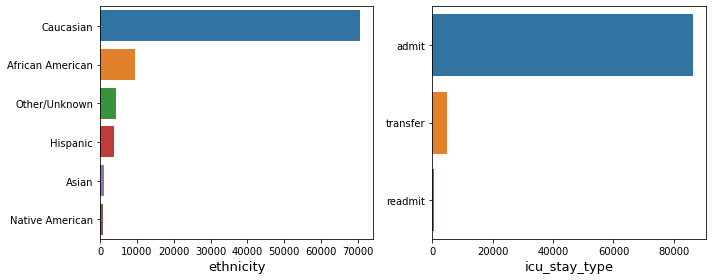

In [18]:
# checking ethnicity and icu_stay_type
plt.figure(figsize=(10,4))

ax1 = plt.subplot(1,2,1)
sns.countplot(y=df['ethnicity'], order=df['ethnicity'].value_counts().index);
plt.xlabel('ethnicity', fontsize=13)
plt.ylabel("")

ax2 = plt.subplot(1,2,2)
sns.countplot(y=df['icu_stay_type'], order=df['icu_stay_type'].value_counts().index);
plt.xlabel('icu_stay_type', fontsize=13)
plt.ylabel("")
plt.tight_layout()

We can see that most of the patients (almost 70000) are of Caucasian in origin and hence this dataset can be said to be biased in favour of Caucasian origin patients.
Most of the patients staying in ICU are new admits.

# Missing Value Check

In [19]:
# Checking for missing values
print("="*20, "\033[1m  Checking for Missing values  \033[0m", "="*20)
missing_feat = list(df.isnull().columns)
if df.isnull().sum().count() != 0:
    print("No of features with missing values: ", len(missing_feat), "\n")
    print("Features with missing values: ", missing_feat, "\n")
else:
    print("No missing values in the dataset")

====================   Checking for Missing values   ====================
No of features with missing values:  185 

Features with missing values:  ['encounter_id', 'patient_id', 'hospital_id', 'hospital_death', 'age', 'bmi', 'elective_surgery', 'ethnicity', 'gender', 'height', 'hospital_admit_source', 'icu_admit_source', 'icu_id', 'icu_stay_type', 'icu_type', 'pre_icu_los_days', 'weight', 'albumin_apache', 'apache_2_diagnosis', 'apache_3j_diagnosis', 'apache_post_operative', 'arf_apache', 'bilirubin_apache', 'bun_apache', 'creatinine_apache', 'fio2_apache', 'gcs_eyes_apache', 'gcs_motor_apache', 'gcs_unable_apache', 'gcs_verbal_apache', 'glucose_apache', 'heart_rate_apache', 'hematocrit_apache', 'intubated_apache', 'map_apache', 'paco2_apache', 'paco2_for_ph_apache', 'pao2_apache', 'ph_apache', 'resprate_apache', 'sodium_apache', 'temp_apache', 'urineoutput_apache', 'ventilated_apache', 'wbc_apache', 'd1_diasbp_invasive_max', 'd1_diasbp_invasive_min', 'd1_diasbp_max', 'd1_diasbp_min',

We find that there are missing values in almost all of the features. Let's have a quick glance at the data info.

# Data Info check

In [20]:
#info table
print("="*10, "\033[1m Information Table \033[0m", "="*10)
df.info()

==========  Information Table  ==========
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Columns: 185 entries, encounter_id to apache_2_bodysystem
dtypes: category(8), float16(170), int16(2), int32(2), int8(3)
memory usage: 31.8 MB


Now, we will seperate our dataframe into target vector and feature matrix for further analysis.

In [21]:
# Separating X and y
y = dataset['hospital_death']
X = dataset.drop(columns=['hospital_death'], axis=1)
print(X.shape, y.shape)

(91713, 184) (91713,)


# Target Information

Let's have a look at the target feature ('hospital_death')

In [22]:
# Function for observing the target
def view_target(df, target):
    # Observing the target
    print("\033[1m Target datatype: \033[0m", df[target].dtypes, "\n")
    print("="*20, "\033[1m  Descriptive Stats of Target  \033[0m", "="*20)
    print(pd.DataFrame(df[target]).describe().T.drop('count',axis=1))
    # subplots
    plt.figure(figsize=(10,5))
    # barplot
    ax1 = plt.subplot(1,2,1)
    cp = sns.countplot(x=df[target], palette=['MediumSeaGreen', 'Tomato'])
    ax1.set_xlabel(target, fontsize=14)
    # setting values over barplot
    sizes = []
    for p in cp.patches:
        height = p.get_height()
        sizes.append(height)
        cp.text(p.get_x() + p.get_width()/2, 
                height + 2000,
                '{}'.format(height),
                ha='center',
                fontsize=14)
    sns.despine(top=True, right=True)
    # pieplot
    ax2 = plt.subplot(1,2,2)
    plt.pie(df[target].value_counts(),
            labels=list(df[target].unique()),
            colors=['MediumSeaGreen', 'Tomato'],
            autopct='%2.2f%%',
            explode=(0.2,0),
            shadow=True,
            textprops={'fontsize':14}
           )
    ax2.set_xlabel(target, fontsize=14)
    plt.tight_layout()

 Target datatype:  int8 

====================   Descriptive Stats of Target   ====================
                    mean       std  min  25%  50%  75%  max
hospital_death  0.086302  0.280811  0.0  0.0  0.0  0.0  1.0


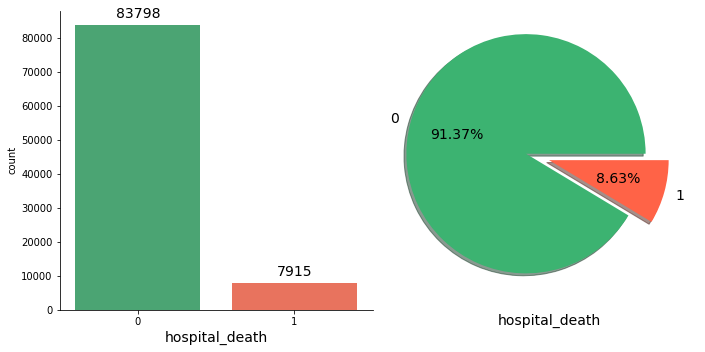

In [23]:
# Observing the target
view_target(dataset, 'hospital_death')

We find that the mean hospital death amounts to 86 per 1000 patients with a deviation of 281 per 1000 patients.
The target feature is highly imbalanced and hence we will have to perform some sampling methods before proceeding with buidling the model.

Now, we will proceed with analyzing our feature matrix.

# Feature analysis

We will filter out numerical, discrete and categorical features from our dataset.

In [24]:
# Extracting numerical features
numfeat = list(dataset.select_dtypes(['int8', 'int16', 'float16', 'int32', 'float32', 'int64', 'float64']).columns)
numfeat

['encounter_id',
 'patient_id',
 'hospital_id',
 'hospital_death',
 'age',
 'bmi',
 'elective_surgery',
 'height',
 'icu_id',
 'pre_icu_los_days',
 'weight',
 'albumin_apache',
 'apache_2_diagnosis',
 'apache_3j_diagnosis',
 'apache_post_operative',
 'arf_apache',
 'bilirubin_apache',
 'bun_apache',
 'creatinine_apache',
 'fio2_apache',
 'gcs_eyes_apache',
 'gcs_motor_apache',
 'gcs_unable_apache',
 'gcs_verbal_apache',
 'glucose_apache',
 'heart_rate_apache',
 'hematocrit_apache',
 'intubated_apache',
 'map_apache',
 'paco2_apache',
 'paco2_for_ph_apache',
 'pao2_apache',
 'ph_apache',
 'resprate_apache',
 'sodium_apache',
 'temp_apache',
 'urineoutput_apache',
 'ventilated_apache',
 'wbc_apache',
 'd1_diasbp_invasive_max',
 'd1_diasbp_invasive_min',
 'd1_diasbp_max',
 'd1_diasbp_min',
 'd1_diasbp_noninvasive_max',
 'd1_diasbp_noninvasive_min',
 'd1_heartrate_max',
 'd1_heartrate_min',
 'd1_mbp_invasive_max',
 'd1_mbp_invasive_min',
 'd1_mbp_max',
 'd1_mbp_min',
 'd1_mbp_noninvasive_m

In [25]:
# Removing id variables from numerical feature list
for i in ['encounter_id', 'patient_id', 'hospital_id', 'icu_id']:
    numfeat.remove(i)

In [26]:
# Extracting discrete numerical features
discfeat = [feat for feat in numfeat if dataset[feat].nunique()<25]
discfeat

['hospital_death',
 'elective_surgery',
 'apache_post_operative',
 'arf_apache',
 'gcs_eyes_apache',
 'gcs_motor_apache',
 'gcs_unable_apache',
 'gcs_verbal_apache',
 'intubated_apache',
 'ventilated_apache',
 'aids',
 'cirrhosis',
 'diabetes_mellitus',
 'hepatic_failure',
 'immunosuppression',
 'leukemia',
 'lymphoma',
 'solid_tumor_with_metastasis']

In [27]:
# Extracting continuous numerical features
contfeat = [feat for feat in numfeat if feat not in discfeat]
contfeat

['age',
 'bmi',
 'height',
 'pre_icu_los_days',
 'weight',
 'albumin_apache',
 'apache_2_diagnosis',
 'apache_3j_diagnosis',
 'bilirubin_apache',
 'bun_apache',
 'creatinine_apache',
 'fio2_apache',
 'glucose_apache',
 'heart_rate_apache',
 'hematocrit_apache',
 'map_apache',
 'paco2_apache',
 'paco2_for_ph_apache',
 'pao2_apache',
 'ph_apache',
 'resprate_apache',
 'sodium_apache',
 'temp_apache',
 'urineoutput_apache',
 'wbc_apache',
 'd1_diasbp_invasive_max',
 'd1_diasbp_invasive_min',
 'd1_diasbp_max',
 'd1_diasbp_min',
 'd1_diasbp_noninvasive_max',
 'd1_diasbp_noninvasive_min',
 'd1_heartrate_max',
 'd1_heartrate_min',
 'd1_mbp_invasive_max',
 'd1_mbp_invasive_min',
 'd1_mbp_max',
 'd1_mbp_min',
 'd1_mbp_noninvasive_max',
 'd1_mbp_noninvasive_min',
 'd1_resprate_max',
 'd1_resprate_min',
 'd1_spo2_max',
 'd1_spo2_min',
 'd1_sysbp_invasive_max',
 'd1_sysbp_invasive_min',
 'd1_sysbp_max',
 'd1_sysbp_min',
 'd1_sysbp_noninvasive_max',
 'd1_sysbp_noninvasive_min',
 'd1_temp_max',
 'd1

In [28]:
# Extracting categorical features
catfeat = dataset.select_dtypes(['category', 'object']).columns
catfeat

Index(['ethnicity', 'gender', 'hospital_admit_source', 'icu_admit_source',
       'icu_stay_type', 'icu_type', 'apache_3j_bodysystem',
       'apache_2_bodysystem'],
      dtype='object')

Now, we will create separate dataframes for each type of features.

In [29]:
# continuous numerical dataset
dnum = dataset[contfeat]
print(dnum.shape)
dnum.head()

(91713, 155)


age        bmi   height  pre_icu_los_days   weight  albumin_apache  \
0  68.0  22.734375  180.250          0.541504  73.8750        2.300781   
1  77.0  27.421875  160.000          0.927734  70.1875             NaN   
2  25.0  31.953125  172.750          0.000694  95.3125             NaN   
3  81.0  22.640625  165.125          0.000694  61.6875             NaN   
4  19.0        NaN  188.000          0.073608      NaN             NaN   

   apache_2_diagnosis  apache_3j_diagnosis  bilirubin_apache  bun_apache  \
0               113.0                502.0          0.399902        31.0   
1               108.0                203.0               NaN         9.0   
2               122.0                703.0               NaN         NaN   
3               203.0               1206.0               NaN         NaN   
4               119.0                601.0               NaN         NaN   

   creatinine_apache  fio2_apache  glucose_apache  heart_rate_apache  \
0           2.509766          NaN           168.0              118.0   
1           0.560059     1.000000           145.0              120.0   
2                NaN          NaN             NaN              102.0   
3                NaN     0.600098           185.0              114.0   
4                NaN          NaN             NaN               60.0   

   hematocrit_apache  map_apache  paco2_apache  paco2_for_ph_apache  \
0           27.40625        40.0           NaN                  NaN   
1           36.90625        46.0          37.0                 37.0   
2                NaN        68.0           NaN                  NaN   
3           25.90625        60.0          30.0                 30.0   
4                NaN       103.0           NaN                  NaN   

   pao2_apache  ph_apache  resprate_apache  sodium_apache  temp_apache  \
0          NaN        NaN             36.0          134.0     39.31250   
1         51.0   7.449219             33.0          145.0     35.09375   
2          NaN        NaN             37.0            NaN     36.68750   
3        142.0   7.390625              4.0            NaN     34.81250   
4          NaN        NaN             16.0            NaN     36.68750   

   urineoutput_apache  wbc_apache  d1_diasbp_invasive_max  \
0                 NaN   14.101562                    46.0   
1                 NaN   12.703125                     NaN   
2                 NaN         NaN                     NaN   
3                 NaN    8.000000                    62.0   
4                 NaN         NaN                     NaN   

   d1_diasbp_invasive_min  d1_diasbp_max  d1_diasbp_min  \
0                    32.0           68.0           37.0   
1                     NaN           95.0           31.0   
2                     NaN           88.0           48.0   
3                    30.0           48.0           42.0   
4                     NaN           99.0           57.0   

   d1_diasbp_noninvasive_max  d1_diasbp_noninvasive_min  d1_heartrate_max  \
0                       68.0                       37.0             119.0   
1                       95.0                       31.0             118.0   
2                       88.0                       48.0              96.0   
3                       48.0                       42.0             116.0   
4                       99.0                       57.0              89.0   

   d1_heartrate_min  d1_mbp_invasive_max  d1_mbp_invasive_min  d1_mbp_max  \
0              72.0                 66.0                 40.0        89.0   
1              72.0                  NaN                  NaN       120.0   
2              68.0                  NaN                  NaN       102.0   
3              92.0                 92.0                 52.0        84.0   
4              60.0                  NaN                  NaN       104.0   

   d1_mbp_min  d1_mbp_noninvasive_max  d1_mbp_noninvasive_min  \
0        46.0                    89.0                    46.0   
1        38.0      

In [30]:
# discrete dataset
ddis = dataset[discfeat]
print(ddis.shape)
ddis.head()

(91713, 18)


hospital_death  elective_surgery  apache_post_operative  arf_apache  \
0               0                 0                      0         0.0   
1               0                 0                      0         0.0   
2               0                 0                      0         0.0   
3               0                 1                      1         0.0   
4               0                 0                      0         0.0   

   gcs_eyes_apache  gcs_motor_apache  gcs_unable_apache  gcs_verbal_apache  \
0              3.0               6.0                0.0                4.0   
1              1.0               3.0                0.0                1.0   
2              3.0               6.0                0.0                5.0   
3              4.0               6.0                0.0                5.0   
4              NaN               NaN                NaN                NaN   

   intubated_apache  ventilated_apache  aids  cirrhosis  diabetes_mellitus  \
0               0.0                0.0   0.0        0.0                1.0   
1               0.0                1.0   0.0        0.0                1.0   
2               0.0                0.0   0.0        0.0                0.0   
3               1.0                1.0   0.0        0.0                0.0   
4               0.0                0.0   0.0        0.0                0.0   

   hepatic_failure  immunosuppression  leukemia  lymphoma  \
0              0.0                0.0       0.0       0.0   
1              0.0                0.0       0.0       0.0   
2              0.0                0.0       0.0       0.0   
3              0.0                0.0       0.0       0.0   
4              0.0                0.0       0.0       0.0   

   solid_tumor_with_metastasis  
0                          0.0  
1                          0.0  
2                          0.0  
3                          0.0  
4                          0.0

In [31]:
# categorical dataset
dcat = dataset[catfeat]
print(dcat.shape)
dcat.head()

(91713, 8)


ethnicity gender hospital_admit_source           icu_admit_source  \
0  Caucasian      M                 Floor                      Floor   
1  Caucasian      F                 Floor                      Floor   
2  Caucasian      F  Emergency Department       Accident & Emergency   
3  Caucasian      F        Operating Room  Operating Room / Recovery   
4  Caucasian      M                   NaN       Accident & Emergency   

  icu_stay_type      icu_type apache_3j_bodysystem apache_2_bodysystem  
0         admit         CTICU               Sepsis      Cardiovascular  
1         admit  Med-Surg ICU          Respiratory         Respiratory  
2         admit  Med-Surg ICU            Metabolic           Metabolic  
3         admit         CTICU       Cardiovascular      Cardiovascular  
4         admit  Med-Surg ICU               Trauma              Trauma

Now, since discrete numerical features can be analyzed the same way as categorical features, we will merge both to create a final dataframe of categorical feature.

# Merging all discrete features with categorical dataframe

In [32]:
# checking discrete feature dtypes
ddis.dtypes

hospital_death                    int8
elective_surgery                  int8
apache_post_operative             int8
arf_apache                     float16
gcs_eyes_apache                float16
gcs_motor_apache               float16
gcs_unable_apache              float16
gcs_verbal_apache              float16
intubated_apache               float16
ventilated_apache              float16
aids                           float16
cirrhosis                      float16
diabetes_mellitus              float16
hepatic_failure                float16
immunosuppression              float16
leukemia                       float16
lymphoma                       float16
solid_tumor_with_metastasis    float16
dtype: object

In [33]:
# Merging all discrete features to categorical type
dcat = pd.concat([dcat, ddis], axis=1)
dcat.head()

ethnicity gender hospital_admit_source           icu_admit_source  \
0  Caucasian      M                 Floor                      Floor   
1  Caucasian      F                 Floor                      Floor   
2  Caucasian      F  Emergency Department       Accident & Emergency   
3  Caucasian      F        Operating Room  Operating Room / Recovery   
4  Caucasian      M                   NaN       Accident & Emergency   

  icu_stay_type      icu_type apache_3j_bodysystem apache_2_bodysystem  \
0         admit         CTICU               Sepsis      Cardiovascular   
1         admit  Med-Surg ICU          Respiratory         Respiratory   
2         admit  Med-Surg ICU            Metabolic           Metabolic   
3         admit         CTICU       Cardiovascular      Cardiovascular   
4         admit  Med-Surg ICU               Trauma              Trauma   

   hospital_death  elective_surgery  apache_post_operative  arf_apache  \
0               0                 0                      0         0.0   
1               0                 0                      0         0.0   
2               0                 0                      0         0.0   
3               0                 1                      1         0.0   
4               0                 0                      0         0.0   

   gcs_eyes_apache  gcs_motor_apache  gcs_unable_apache  gcs_verbal_apache  \
0              3.0               6.0                0.0                4.0   
1              1.0               3.0                0.0                1.0   
2              3.0               6.0                0.0                5.0   
3              4.0               6.0                0.0                5.0   
4              NaN               NaN                NaN                NaN   

   intubated_apache  ventilated_apache  aids  cirrhosis  diabetes_mellitus  \
0               0.0                0.0   0.0        0.0                1.0   
1               0.0                1.0   0.0        0.0                1.0   
2               0.0                0.0   0.0        0.0                0.0   
3               1.0                1.0   0.0        0.0                0.0   
4               0.0                0.0   0.0        0.0                0.0   

   hepatic_failure  immunosuppression  leukemia  lymphoma  \
0              0.0                0.0       0.0       0.0   
1              0.0                0.0       0.0       0.0   
2              0.0                0.0       0.0       0.0   
3              0.0                0.0       0.0       0.0   
4              0.0                0.0       0.0       0.0   

   solid_tumor_with_metastasis  
0                          0.0  
1                          0.0  
2                          0.0  
3                          0.0  
4                          0.0

Now, that we have merged our discrete features with categorical features, we will convert all the numerical datatypes to type 'category'

In [34]:
# changing 'int8' discrete features to type 'categorical'
change_dtypes(dcat, "int8", "category")

Datatype of hospital_death converted from: int8 to category 

Datatype of elective_surgery converted from: int8 to category 

Datatype of apache_post_operative converted from: int8 to category 



In [35]:
# changing 'float16' discrete features to type 'categorical'
change_dtypes(dcat, "float16", "category")

Datatype of arf_apache converted from: float16 to category 

Datatype of gcs_eyes_apache converted from: float16 to category 

Datatype of gcs_motor_apache converted from: float16 to category 

Datatype of gcs_unable_apache converted from: float16 to category 

Datatype of gcs_verbal_apache converted from: float16 to category 

Datatype of intubated_apache converted from: float16 to category 

Datatype of ventilated_apache converted from: float16 to category 

Datatype of aids converted from: float16 to category 

Datatype of cirrhosis converted from: float16 to category 

Datatype of diabetes_mellitus converted from: float16 to category 

Datatype of hepatic_failure converted from: float16 to category 

Datatype of immunosuppression converted from: float16 to category 

Datatype of leukemia converted from: float16 to category 

Datatype of lymphoma converted from: float16 to category 

Datatype of solid_tumor_with_metastasis converted from: float16 to category 



Let's now explore both numerical and categorical dataframes.

# Numerical feature analysis

In [36]:
dnum.describe()

age           bmi     height  pre_icu_los_days       weight  \
count  87485.0  88284.000000  90379.000      91713.000000  88993.00000   
mean       NaN           NaN        NaN               NaN          NaN   
std        0.0      0.000000      0.000          0.000000      0.00000   
min       16.0     14.843750    137.250        -24.953125     38.59375   
25%       52.0     23.640625    162.500          0.035431     66.81250   
50%       65.0     27.656250    170.125          0.138916     80.31250   
75%       75.0     32.937500    177.750          0.408936     97.12500   
max       89.0     67.812500    195.625        159.125000    186.00000   

       albumin_apache  apache_2_diagnosis  apache_3j_diagnosis  \
count    3.733400e+04             90051.0         90612.000000   
mean              inf                 NaN                  NaN   
std      6.816406e-01                 NaN                  NaN   
min      1.200195e+00               101.0             0.010002   
25%      2.400391e+00               113.0           203.000000   
50%      2.900391e+00               122.0           409.000000   
75%      3.400391e+00               301.0           703.000000   
max      4.601562e+00               308.0          2202.000000   

       bilirubin_apache  bun_apache  creatinine_apache   fio2_apache  \
count      33579.000000     72451.0       72860.000000  20845.000000   
mean           1.147461         NaN                NaN      0.595703   
std            2.166016         0.0           0.000000      0.263428   
min            0.099976         4.0           0.300049      0.209961   
25%            0.399902        13.0           0.720215      0.399902   
50%            0.600098        19.0           0.979980      0.500000   
75%            1.099609        32.0           1.530273      0.850098   
max           51.000000       127.0          11.179688      1.000000   

       glucose_apache  heart_rate_apache  hematocrit_apache  map_apache  \
count         80677.0            90835.0       71835.000000     90719.0   
mean              NaN                NaN                NaN         NaN   
std               NaN                0.0           0.000000         0.0   
min              39.0               30.0          16.203125        40.0   
25%              97.0               86.0          28.000000        54.0   
50%             133.0              104.0          33.187500        67.0   
75%             196.0              120.0          37.906250       125.0   
max             598.5              178.0          51.406250       200.0   

       paco2_apache  paco2_for_ph_apache  pao2_apache     ph_apache  \
count  2.084500e+04         2.084500e+04      20845.0  2.084500e+04   
mean            inf                  inf          inf           inf   
std    1.238281e+01         1.238281e+01          inf  9.777832e-02   
min    1.800000e+01         1.800000e+01         31.0  6.960938e+00   
25%    3.440625e+01         3.440625e+01         77.5  7.308594e+00   
50%    4.000000e+01         4.000000e+01        103.5  7.359375e+00   
75%    4.700000e+01         4.700000e+01        153.0  7.417969e+00   
max    9.500000e+01         9.500000e+01        498.0  7.589844e+00   

       resprate_apache  sodium_apache  temp_apache  urineoutput_apache  \
count          90479.0        73113.0  87605.00000             42715.0   
mean               NaN            NaN          NaN                 inf   
std                0.0            0.0      0.00000                 inf   
min                4.0          117.0     32.09375                 0.0   
25%               11.0          135.0     36.18750               740.5   
50%               28.0          138.0     36.50000              1386.0   
75%               36.0          141.0     36.68750              2324.0   
max               60.0          158.0     39.68750              8720.0   

         wbc_apache  d1_diasbp_invasive_max  d1_diasbp_invasive_min  \
count  69701.000000             23729.00000   

##### Observations:
* Most of the patients are more than 50yrs old with an average age of 62.
* Average BMI of patients is around 29
* Average height and weight of all patients is around:  169cm and 84kg

In [37]:
# function for viewing numerical features
def plot_num(df, size=(15,6), layout=(2,4)):
    # Density plots of numerical data
    df.plot(kind='kde', 
            subplots=True, 
            layout=layout, 
            sharex=False,
            figsize=size,
            title=list(df.columns),
            legend=False)
    plt.tight_layout()

Wall time: 3min 19s


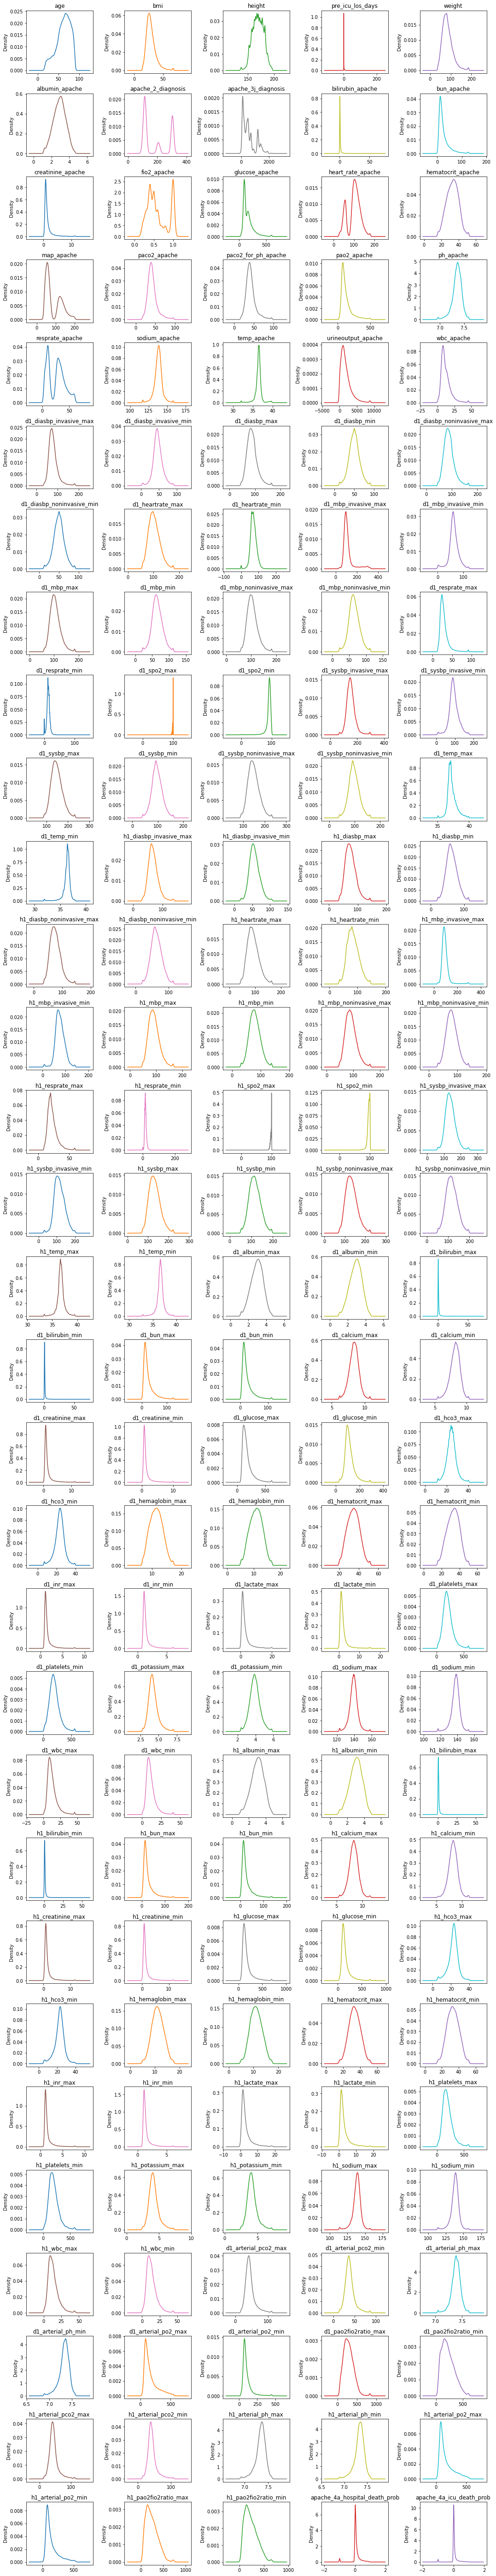

In [38]:
%%time
# plotting the distribution of numerical features
plot_num(dnum, size=(15,80), layout=(32,5))

##### Observations:
* Most of the patients are aged between 60 and 80
* Average BMI of most patients are around 30.
* Most patients are between 160 and 180 cm in height.
* Most patients have weights less than 100kg though some people with wights near 200kg can also be observed.
* 'apache_4a_hospital_death_prob' and 'apache_4a_icu_death_prob' seems highly correlated.
* Though most features are unimodal and show good normal distribution pattern, some features with bimodal distribution and skewed distribution can be observed.

Let's observe how the numerical feature distribution varies with respect to the target.

In [39]:
# function for plotting numerical features against categorical target
def plot_xnum_ycat(df, target, plottype, alpha=0.35, size=(15,80), ticksize=13, titlesize=15):
    plt.figure(figsize=size)
    plotnumber=1

    for col in df:
        if plotnumber < len(df.columns):
            ax = plt.subplot(32,5,plotnumber)
            if plottype == 'kde':
                sns.kdeplot(data=df, x=col, hue=target, shade=True, palette='Set2')
                plt.xlabel('')
                plt.ylabel('')
                plt.title(col, fontsize=titlesize)
            elif plottype == 'box':
                sns.boxplot(data=df, x=target, y=df[col], palette='Set2')
                plt.xlabel('')
                plt.ylabel('')
                plt.title(col, fontsize=titlesize)
        plotnumber +=1
    plt.tight_layout()

Wall time: 16.2 s


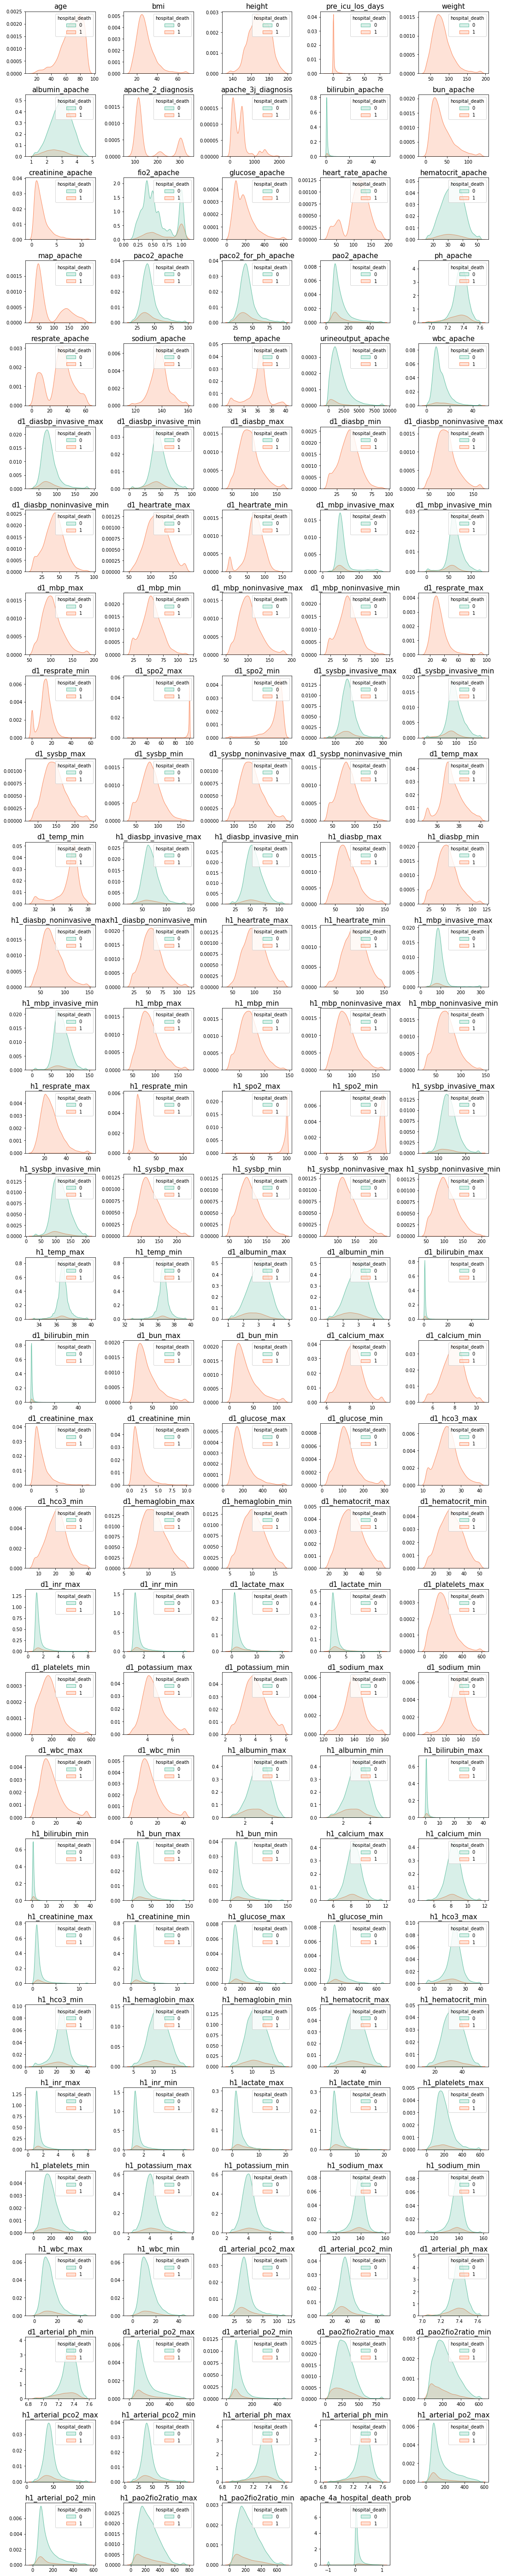

In [40]:
%%time
# plotting kde plot
plot_xnum_ycat(dnum, target=y, plottype='kde')

Wall time: 10.6 s


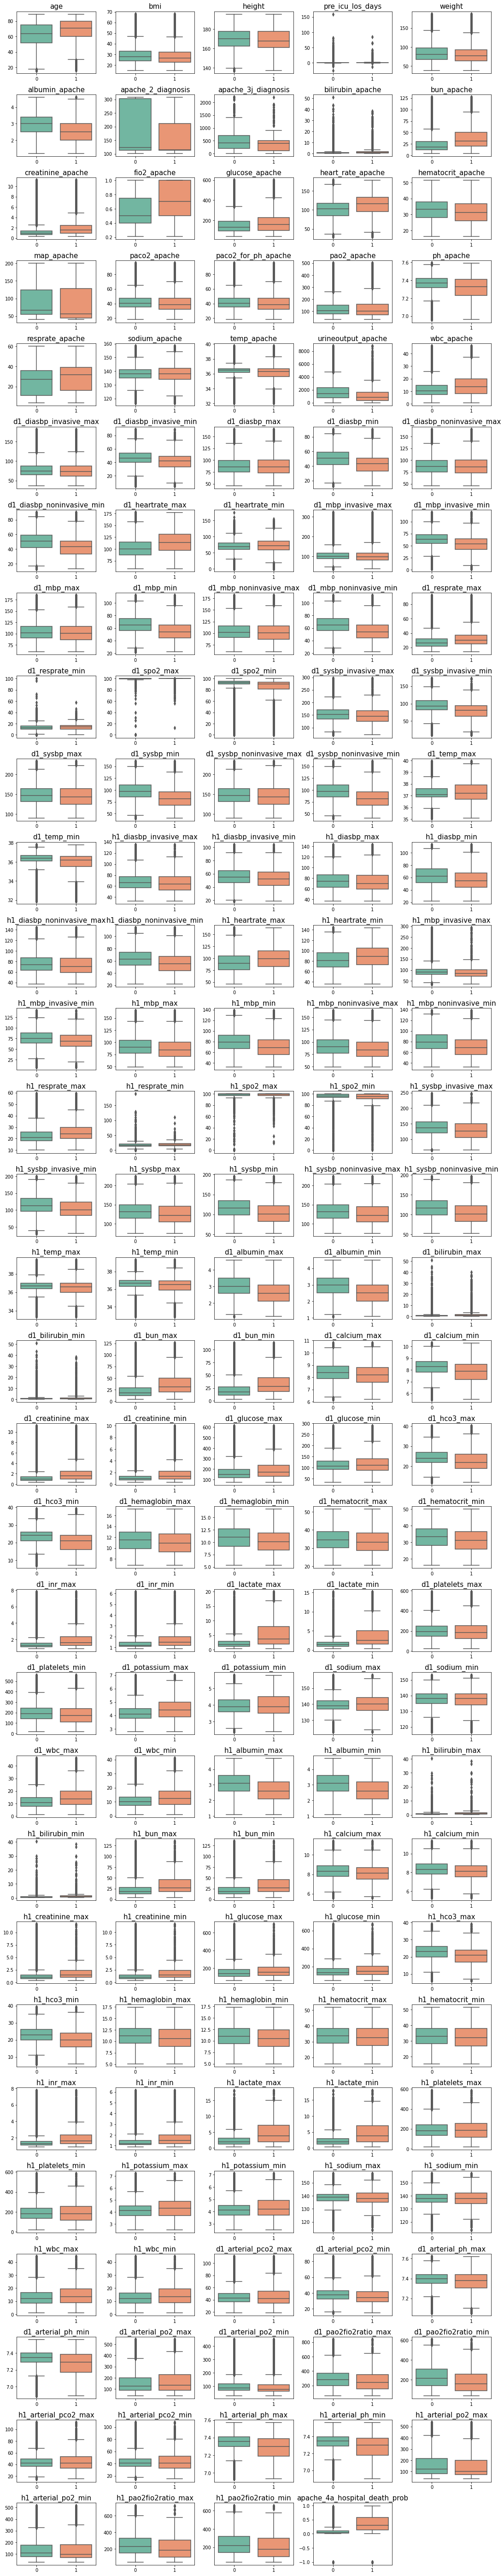

In [41]:
%%time
# plotting box plot
plot_xnum_ycat(dnum, target=y, plottype='box') 

In [42]:
# creating a function for viewing quick summary of numerical features
def quickviewnum(feat, setlimit=False, xl=(0,0)):
    print("\033[1m Feature Description \033[0m \n","="*20,"\n", view_datadict(feat))
    sns.kdeplot(dnum[feat], hue=dcat['hospital_death'], shade=True, palette='Set2')
    if setlimit:
        plt.xlim(xl[0], xl[1])
    plt.show()

 Feature Description  
 The length of stay of the patient between hospital admission and unit admission in unit: Days


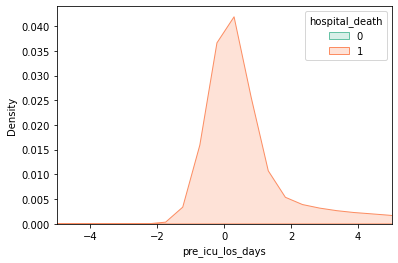

In [43]:
quickviewnum('pre_icu_los_days', True, (-5,5))

##### Some key Observations:
* Hospital death rate increases from 40 to 80 yrs of **age** and is at its peak for people aged 80 to 90
* Patients with **BMI** between 20 and 30 are more likely to die.
* Hospital death rate increases for people having **heights** from 140 to 170 cm and thereafter drops. Peak deaths are observerd for people of height around 165cm.
* More deaths are observed for **ICU ID** 500 to 700
* Patients who died stayed only for less than 24hrs between hospital and unit admission. This might indicate that most of the patient deaths are due to emergency cases.
* Most of the patients who died had **weights** ranging from 60 to 80kg with peak number of patients having around 70kg.

Let's now extract the skewed numerical features

In [44]:
# function for extracting skewed features
def outliers(df):
    # Separating positively and negatively skewed features
    # Keeping a threshold of skewness=0.7 for identifying positively and negatively skewed features
    positively_skewed = [feat for feat in df.columns if df[feat].skew()>0.7]
    negatively_skewed = [feat for feat in df.columns if df[feat].skew()<-0.7]
    print("\033[1m Positively skewed features: \033[0m\n", positively_skewed)
    print("\n\033[1m Negatively skewed features: \033[0m\n",negatively_skewed,"\n")
    # Checking for outliers
    skewed_features = positively_skewed + negatively_skewed

    outlier_dict={}

    for feat in df.columns:
        if feat in skewed_features:
            # Applying IQR for identifying outliers for skewed features
            q1 = df[feat].quantile(0.25)
            q3 = df[feat].quantile(0.75)
            iqr = q3 - q1
            upper = q3+(1.5*iqr)
            lower = q1-(1.5*iqr)
            outlier_count = np.sum(df[feat]>upper)+np.sum(df[feat]<lower)
        else:
            # Applying 3 standard deviations for normally distributed features
            feat_mean = np.mean(df[feat])
            feat_stdev = np.std(df[feat])
            upper = feat_mean+(3*feat_stdev)
            lower = feat_mean-(3*feat_stdev)
            outlier_count = np.sum(df[feat]>upper)+np.sum(df[feat]<lower)
        outlier_dict[feat]=outlier_count

    for feat,count in outlier_dict.items():
        print("Outliers in \033[1m'{}'\033[0m: {} %".format(feat, (count*100/df.shape[0]).round(2)))
        
    return positively_skewed, negatively_skewed, skewed_features

In [45]:
# extracting skewed features
pos_skew, neg_skew, total_skew = outliers(dnum)

 Positively skewed features: 
 ['bilirubin_apache', 'paco2_apache', 'paco2_for_ph_apache', 'h1_diasbp_invasive_max', 'h1_diasbp_invasive_min', 'd1_bilirubin_max', 'd1_bilirubin_min', 'd1_inr_max', 'd1_inr_min', 'd1_lactate_max', 'd1_lactate_min', 'h1_bilirubin_max', 'h1_bilirubin_min', 'h1_bun_max', 'h1_bun_min', 'h1_creatinine_max', 'h1_creatinine_min', 'h1_inr_max', 'h1_inr_min', 'h1_lactate_max', 'h1_lactate_min', 'h1_potassium_max', 'h1_potassium_min', 'h1_wbc_max', 'h1_wbc_min', 'd1_arterial_pco2_max', 'd1_arterial_pco2_min', 'h1_arterial_pco2_max', 'h1_arterial_pco2_min']

 Negatively skewed features: 
 ['ph_apache', 'h1_sodium_max', 'h1_sodium_min', 'd1_arterial_ph_min', 'h1_arterial_ph_max', 'h1_arterial_ph_min'] 

Outliers in 'age': 0.0 %
Outliers in 'bmi': 0.0 %
Outliers in 'height': 0.0 %
Outliers in 'pre_icu_los_days': 0.0 %
Outliers in 'weight': 0.0 %
Outliers in 'albumin_apache': 40.71 %
Outliers in 'apache_2_diagnosis': 0.0 %
Outliers in 'apache_3j_diagnosis': 0.0 %
Outl

Let's check the distribution of outliers using boxplots.

In [46]:
# plotting box plots
def boxplots(df, size=(15,3), layout=(2,4)):
    # Visualizing outliers
    plt.figure(figsize=size, facecolor='white')
    plotnumber = 1

    for col in df:
        if plotnumber<= len(df.columns):
            ax1 = plt.subplot(layout[0], layout[1], plotnumber)
            sns.boxplot(x=df[col], palette='Set2')
            plt.xticks(fontsize=13)
            plt.yticks(fontsize=13)
            plt.xlabel(col,fontsize=15)
            plt.ylabel(' ',fontsize=15)
        plotnumber+=1
    plt.tight_layout()

Wall time: 4.93 s


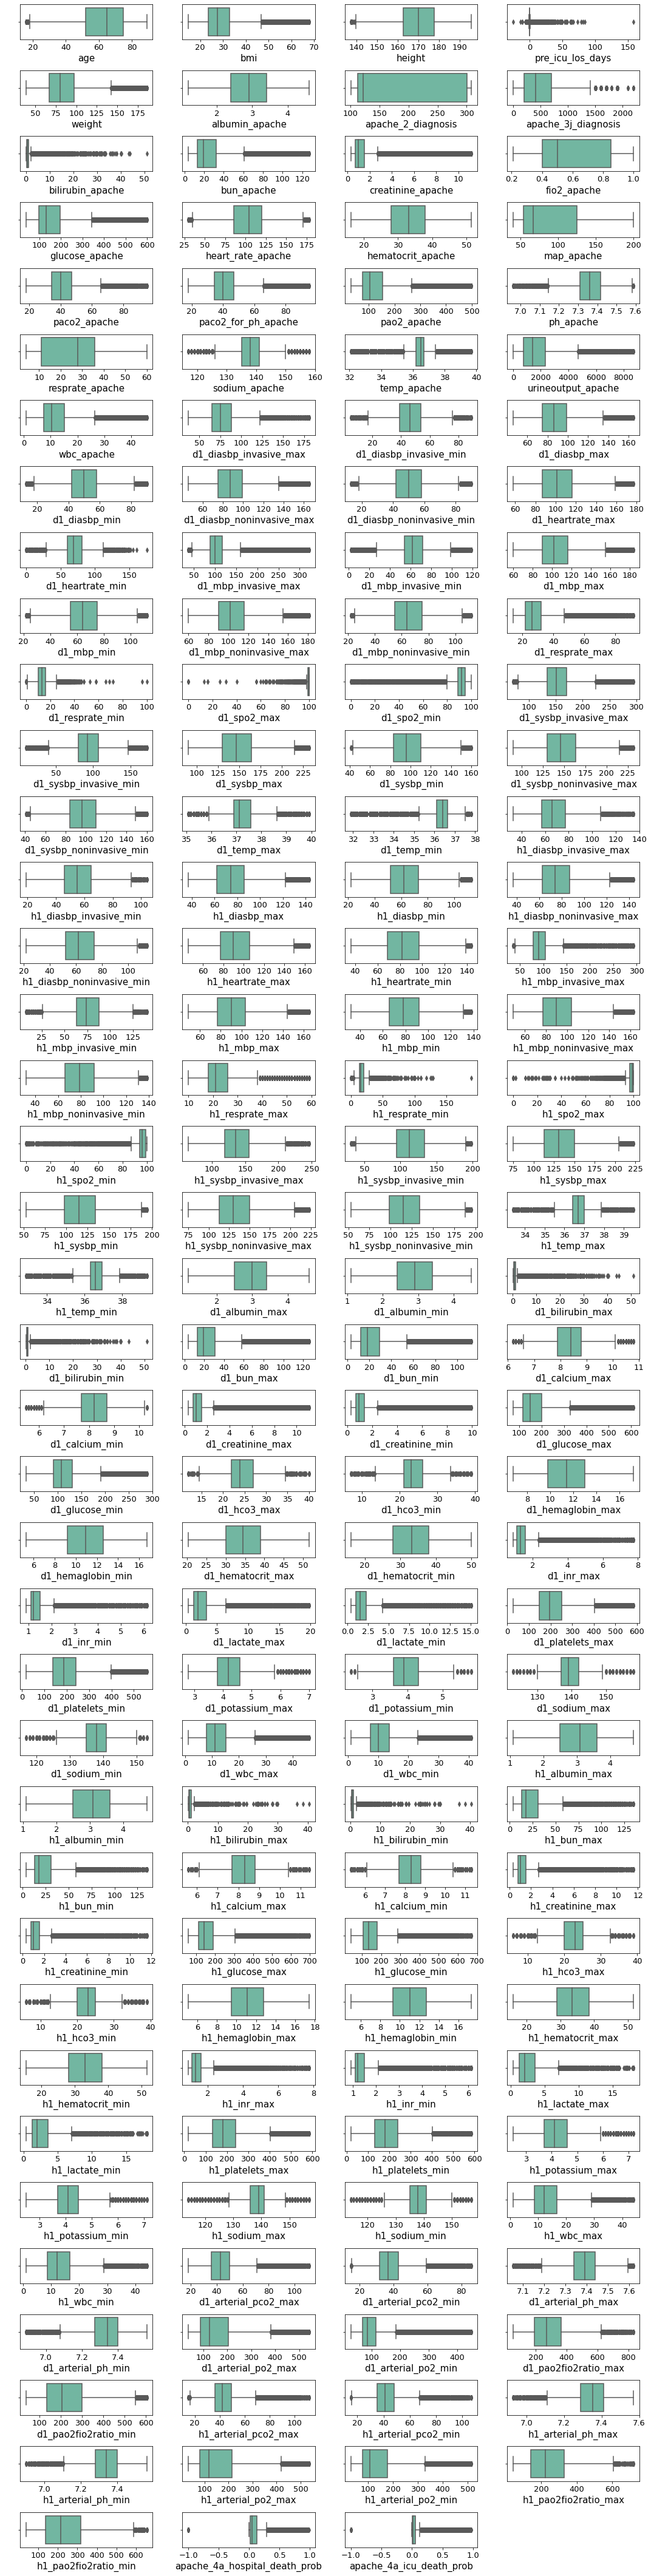

In [47]:
%%time
# plotting boxplots
boxplots(dnum, size=(15, 60), layout=(40,4), )

It can be observed that there are too many outliers and extreme outliers in the data. We might have to go one step beoynd transforming the features to correct the outliers. But for now, let's explore the categorical features.

# Categorical Features

In [48]:
dcat.describe()

ethnicity gender hospital_admit_source      icu_admit_source  \
count       90318  91688                 70304                 91601   
unique          6      2                    15                     5   
top     Caucasian      M  Emergency Department  Accident & Emergency   
freq        70684  49469                 36962                 54060   

       icu_stay_type      icu_type apache_3j_bodysystem apache_2_bodysystem  \
count          91713         91713                90051               90051   
unique             3             8                   11                  10   
top            admit  Med-Surg ICU       Cardiovascular      Cardiovascular   
freq           86183         50586                29999               38816   

        hospital_death  elective_surgery  apache_post_operative  arf_apache  \
count            91713             91713                  91713     90998.0   
unique               2                 2                      2         2.0   
top                  0                 0                      0         0.0   
freq             83798             74862                  73269     88452.0   

        gcs_eyes_apache  gcs_motor_apache  gcs_unable_apache  \
count           89812.0           89812.0            90676.0   
unique              4.0               6.0                2.0   
top                 4.0               6.0                0.0   
freq            62995.0           70960.0            89812.0   

        gcs_verbal_apache  intubated_apache  ventilated_apache     aids  \
count             89812.0           90998.0            90998.0  90998.0   
unique                5.0               2.0                2.0      2.0   
top                   5.0               0.0                0.0      0.0   
freq              56909.0           77237.0            61358.0  90920.0   

        cirrhosis  diabetes_mellitus  hepatic_failure  immunosuppression  \
count     90998.0            90998.0          90998.0            90998.0   
unique        2.0                2.0              2.0                2.0   
top           0.0                0.0              0.0                0.0   
freq      89570.0            70506.0          89816.0            88617.0   

        leukemia  lymphoma  solid_tumor_with_metastasis  
count    90998.0   90998.0                      90998.0  
unique       2.0       2.0                          2.0  
top          0.0       0.0                          0.0  
freq     90355.0   90622.0                      89120.0

##### Observations:
* Most of the patients are males and of Caucasian origin.
* Most of the hospital admissions are from Emergency department.
* Majority of the patients doesn't have any pre-existing conditions like aids, cirrhosis, diabetes mellitus, hepatic failure, immunosuppression, leukemia, lymphoma or any solid tumour with metastasis.

Let's check the composition of categorical variables.

In [49]:
# function for plotting categorical features
def plot_cat(df, size=(20,20), ticksize=13, titlesize=18):
    # Plotting Categorical features distribution
    plt.figure(figsize=size)
    plotnumber = 1

    for col in df:
        if plotnumber < 13:
            ax1 = plt.subplot(5,3,plotnumber)
            sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette="Set2")
            plt.xticks(fontsize=ticksize, rotation=45)
            plt.yticks(fontsize=ticksize)
            plt.title(f"{col}", fontsize=titlesize)
            plt.xlabel('')
            plt.ylabel('')
        plotnumber +=1
    plt.tight_layout()

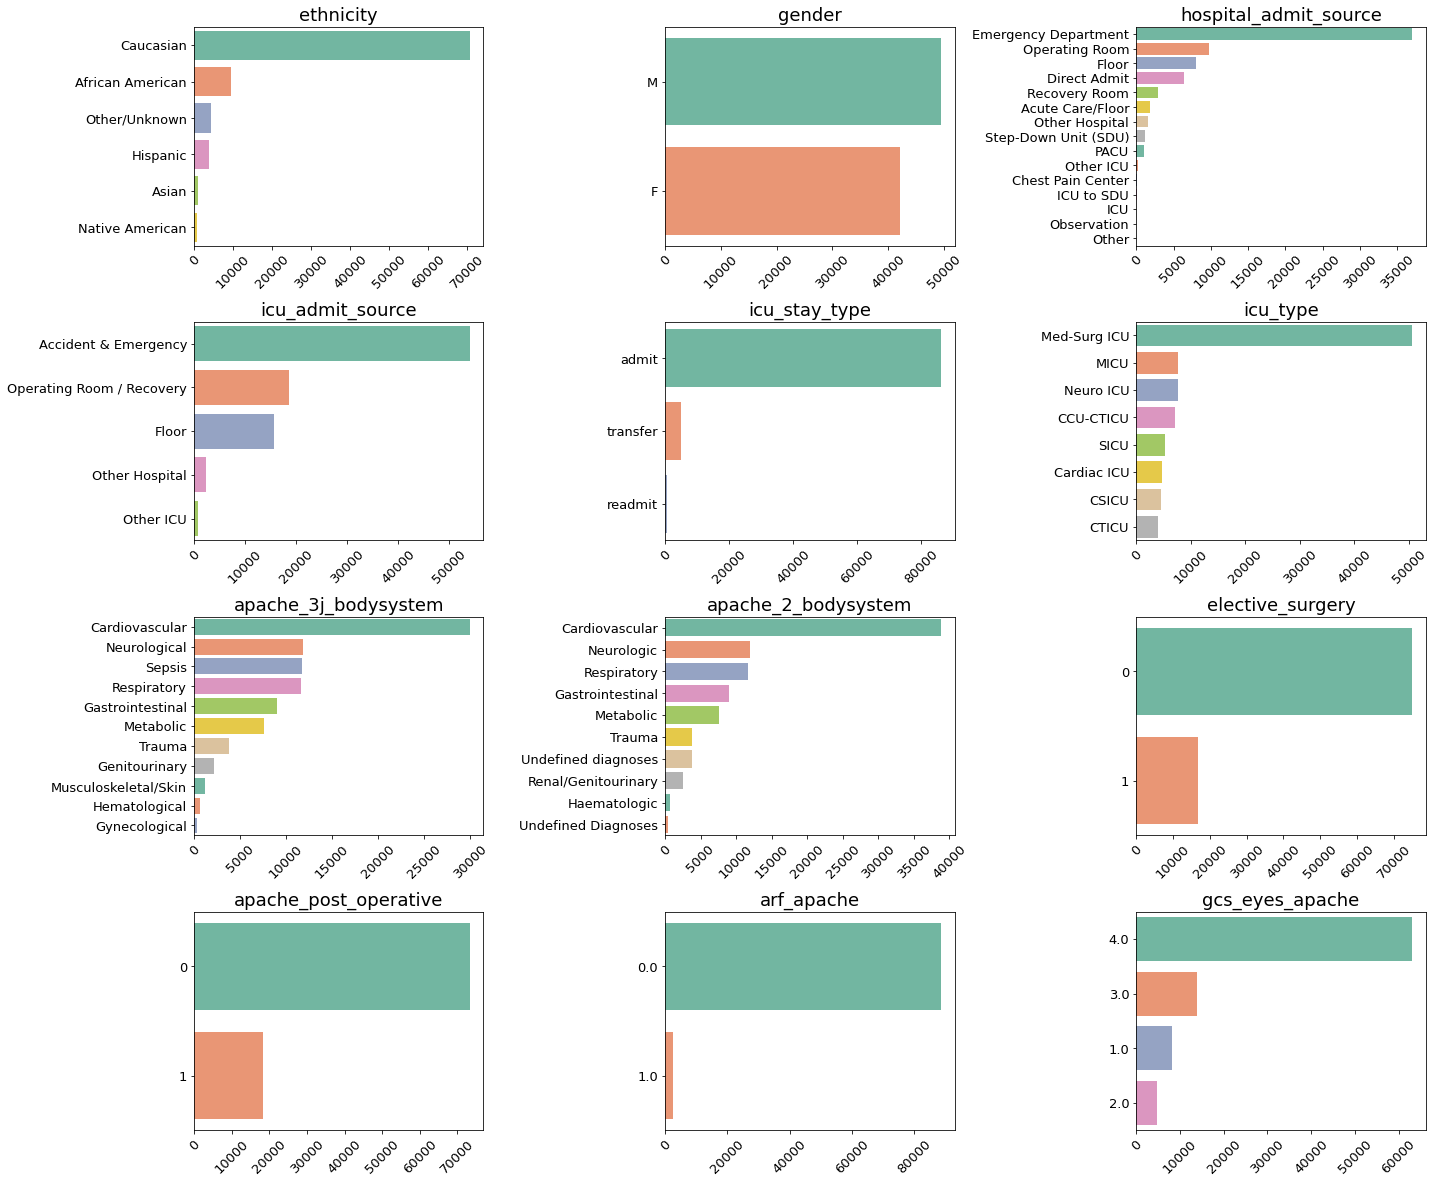

In [50]:
plot_cat(dcat.drop('hospital_death', axis=1))

##### Observations:
* Most of the patients are of "Caucasian" in origin.
* Majority of the patients are males (more than 10,000 wrt female count)
* Majority of the patients were admitted from "Emergency department", followed by patients from "Operating Room".
* Majority of the ICU admits are due to accident and emergency followed by patients from "Operating Room".

Let's observe how each categorical feature varies with respect to the target.

## Plotting categorical features against target

In [51]:
def plot_xcat_ycat(df, target, size=(20,35), ticksize=13, titlesize=18):
    # Plotting Categorical features distribution
    plt.figure(figsize=size)
    plotnumber = 1

    for col in df:
        if plotnumber < 24:
            ax1 = plt.subplot(8,3,plotnumber)
            sns.countplot(data=df, y=col, order=df[col].value_counts().index, hue=target, palette='Set2')
            plt.xticks(fontsize=ticksize, rotation=45)
            plt.yticks(fontsize=ticksize)
            plt.title(f"{col}", fontsize=titlesize)
            plt.xlabel('')
            plt.ylabel('')
        plotnumber +=1
    plt.tight_layout()

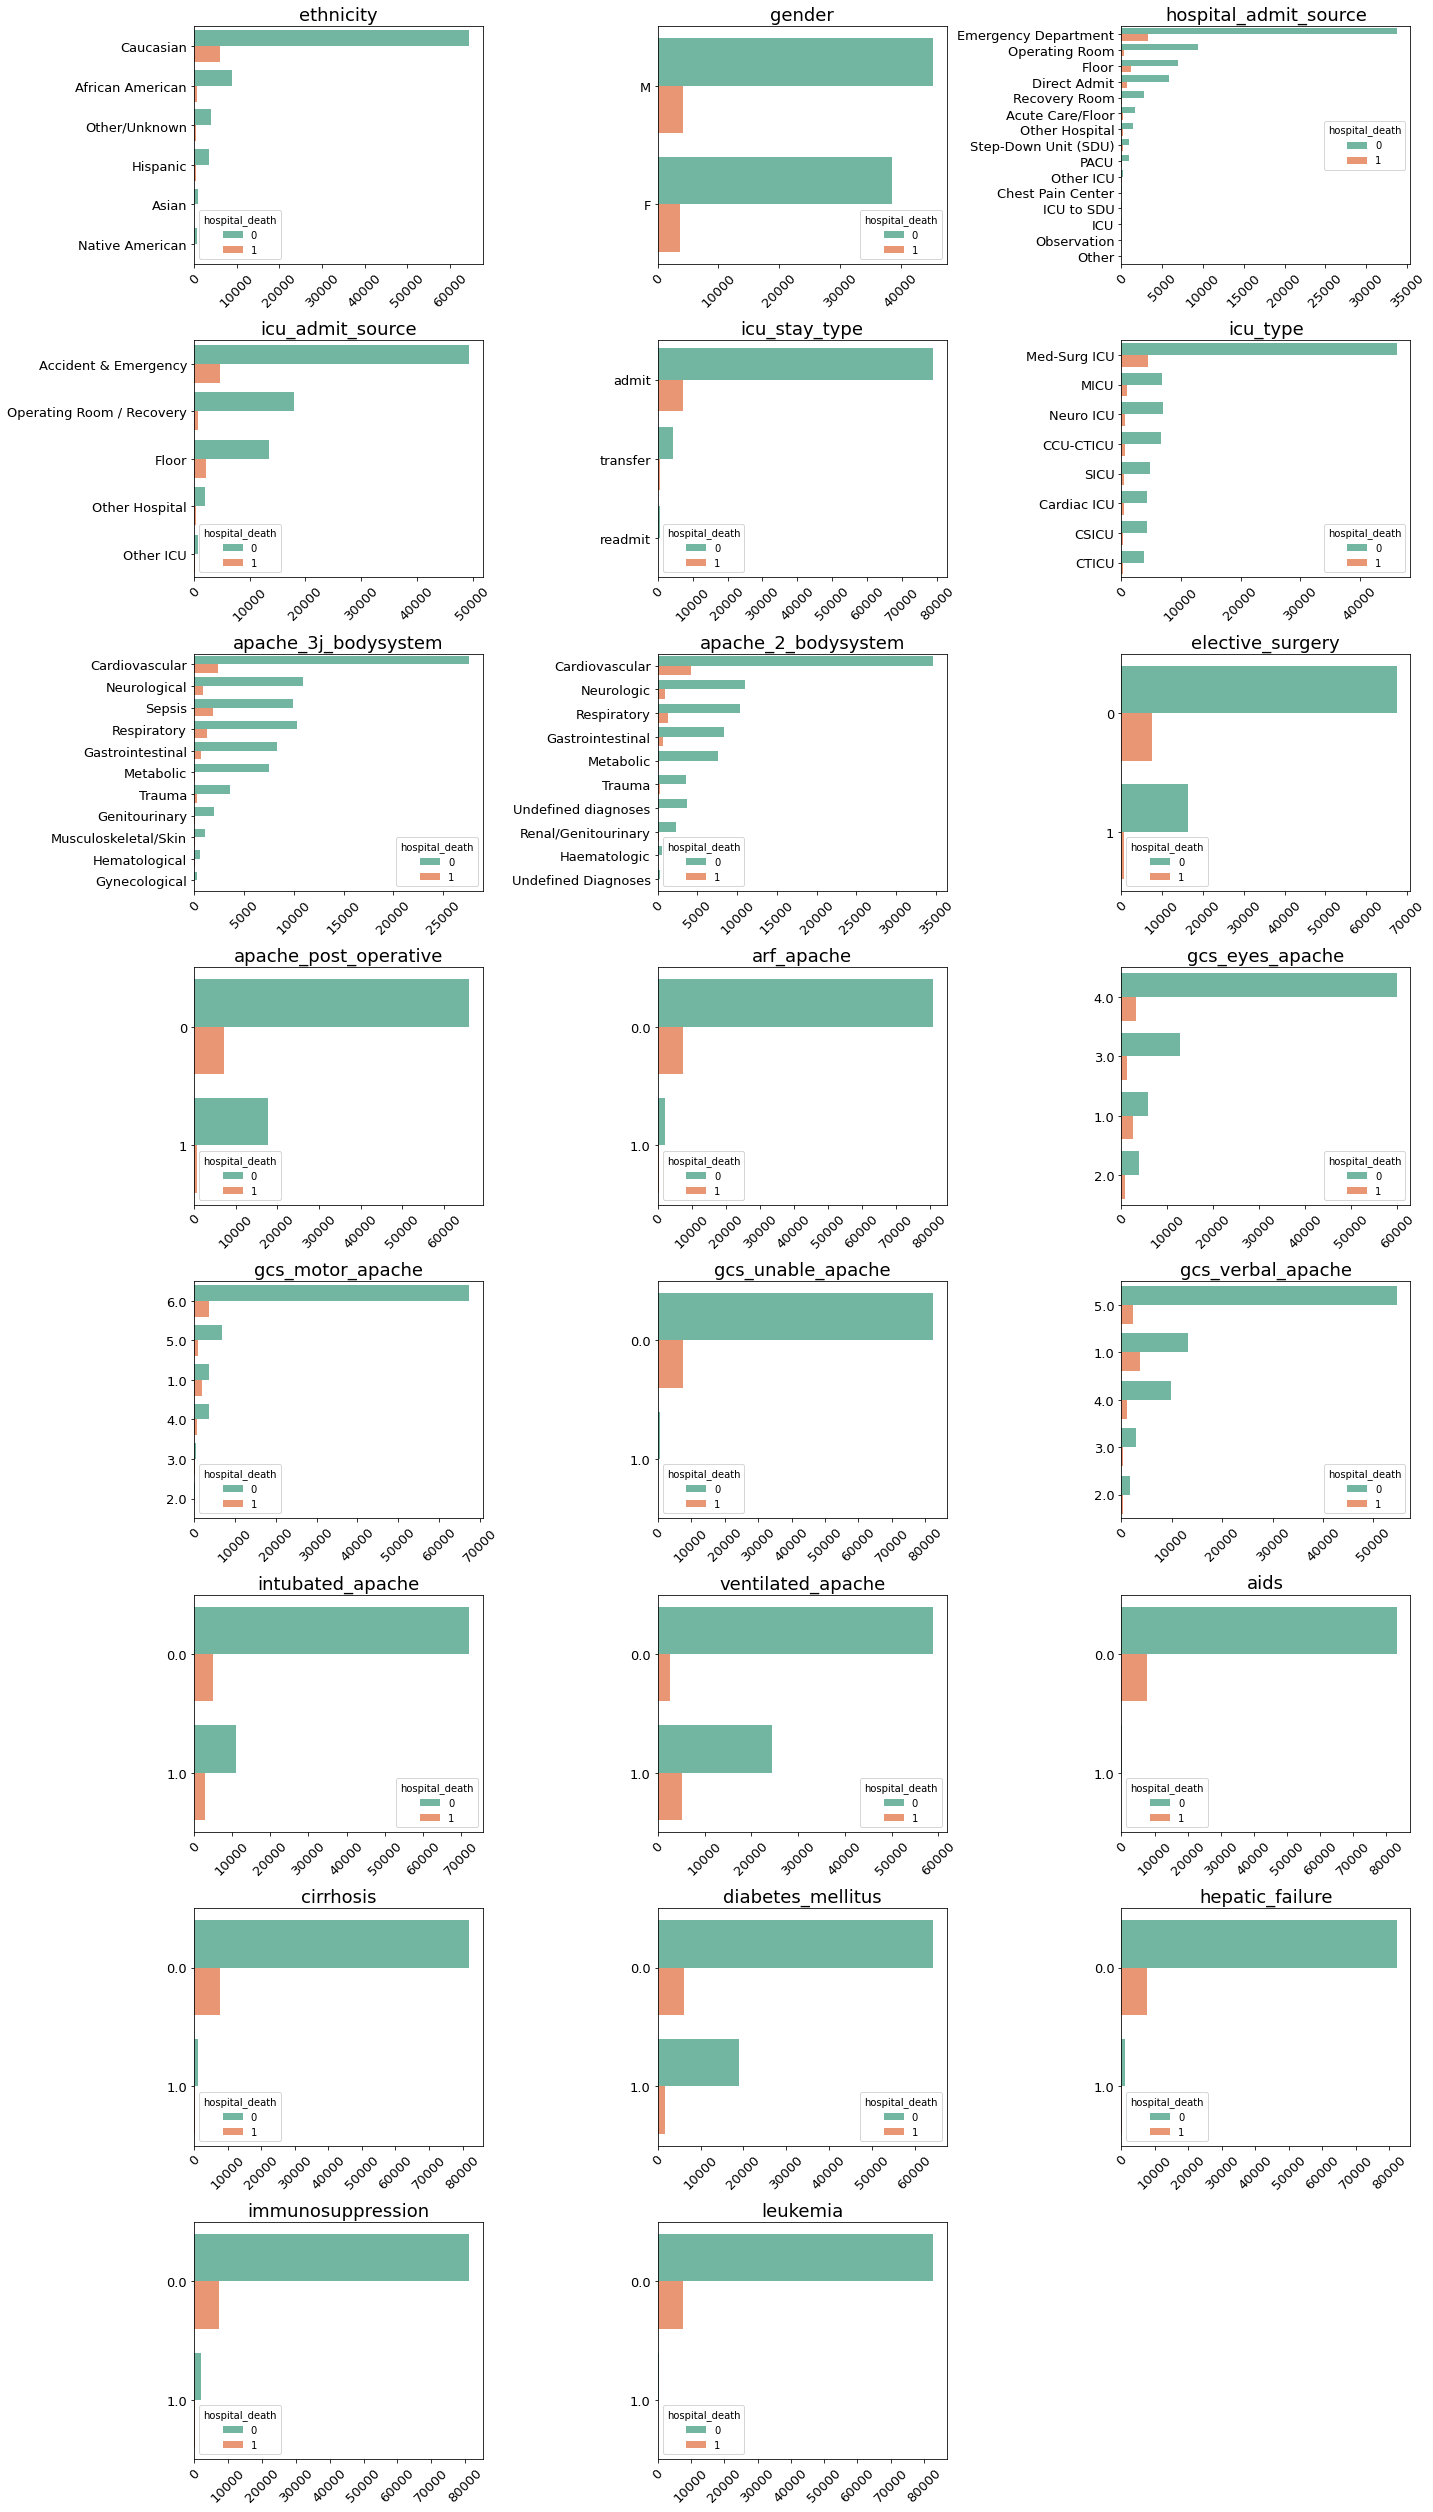

In [52]:
plot_xcat_ycat(dcat.drop(columns='hospital_death', axis=1), target=y)

In [53]:
# creating a function for viewing quick summary of categorical features
def quickviewcat(feat, setlimit=False, xl=(0,0)):
    print("\033[1m Feature Description \033[0m \n","="*20,"\n", view_datadict(feat))
    g = sns.FacetGrid(data=dcat, col='hospital_death', height=3)
    g.map(sns.countplot, feat, palette='Set2')
    if setlimit:
        plt.xlim(xl[0], xl[1])

 Feature Description  
 The genotypical sex of the patient in unit: None


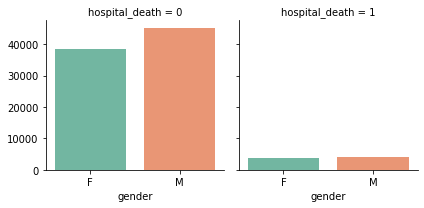

In [54]:
quickviewcat('gender')

Let's move on to handling missing values. All the features are having missing values. We will use missingno library to visualize the missing values for our analysis.

# Handling Missing Values

(91713, 184)


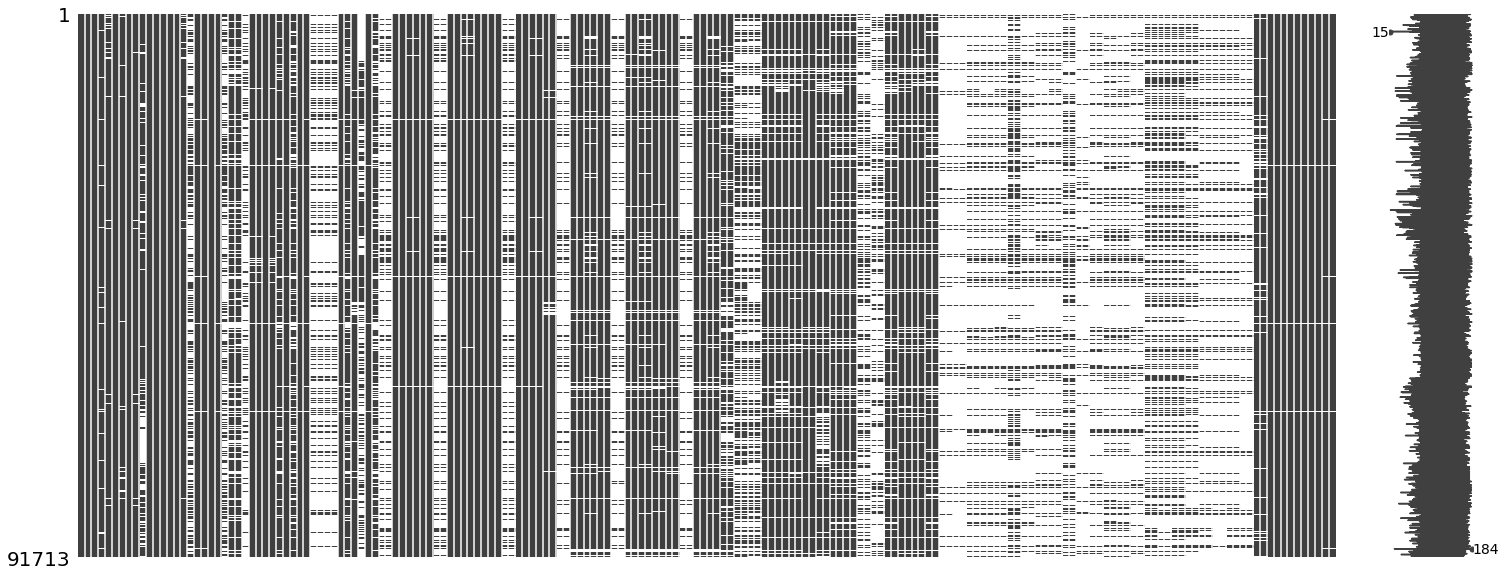

In [55]:
# checking missing values
import missingno as msno

# creating a dataframe of missing values
Xmiss = X[X.isnull().columns]

print(Xmiss.shape)

msno.matrix(Xmiss);

There are multiple features with huge number of missing values. We will drop those feature with more than 50% missing values.

In [56]:
Xmiss.shape

(91713, 184)

### Features with more than 50% missing values

For now, let's drop features with more than 50% missing values.

In [57]:
# dropping features with more than 50% missing values
thresh = len(Xmiss)*0.5
Xmiss = Xmiss.dropna(axis=1, thresh=thresh)

(91713, 110)


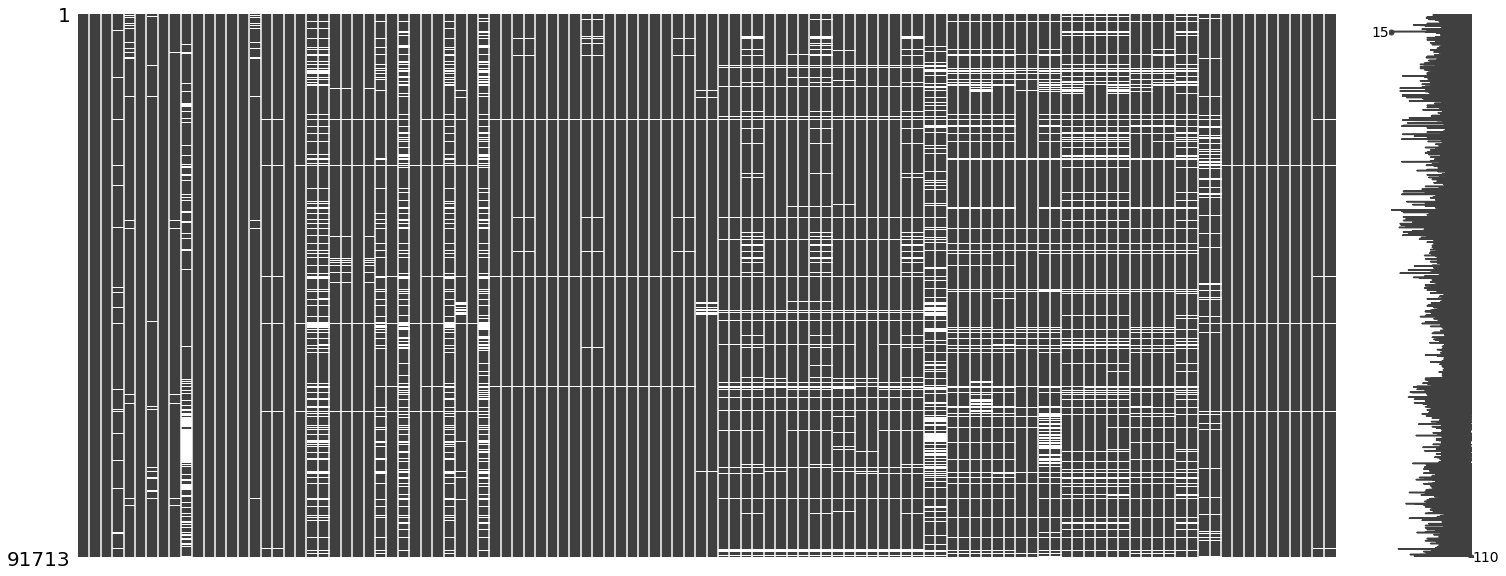

In [58]:
# checking missing values
print(Xmiss.shape)

msno.matrix(Xmiss);

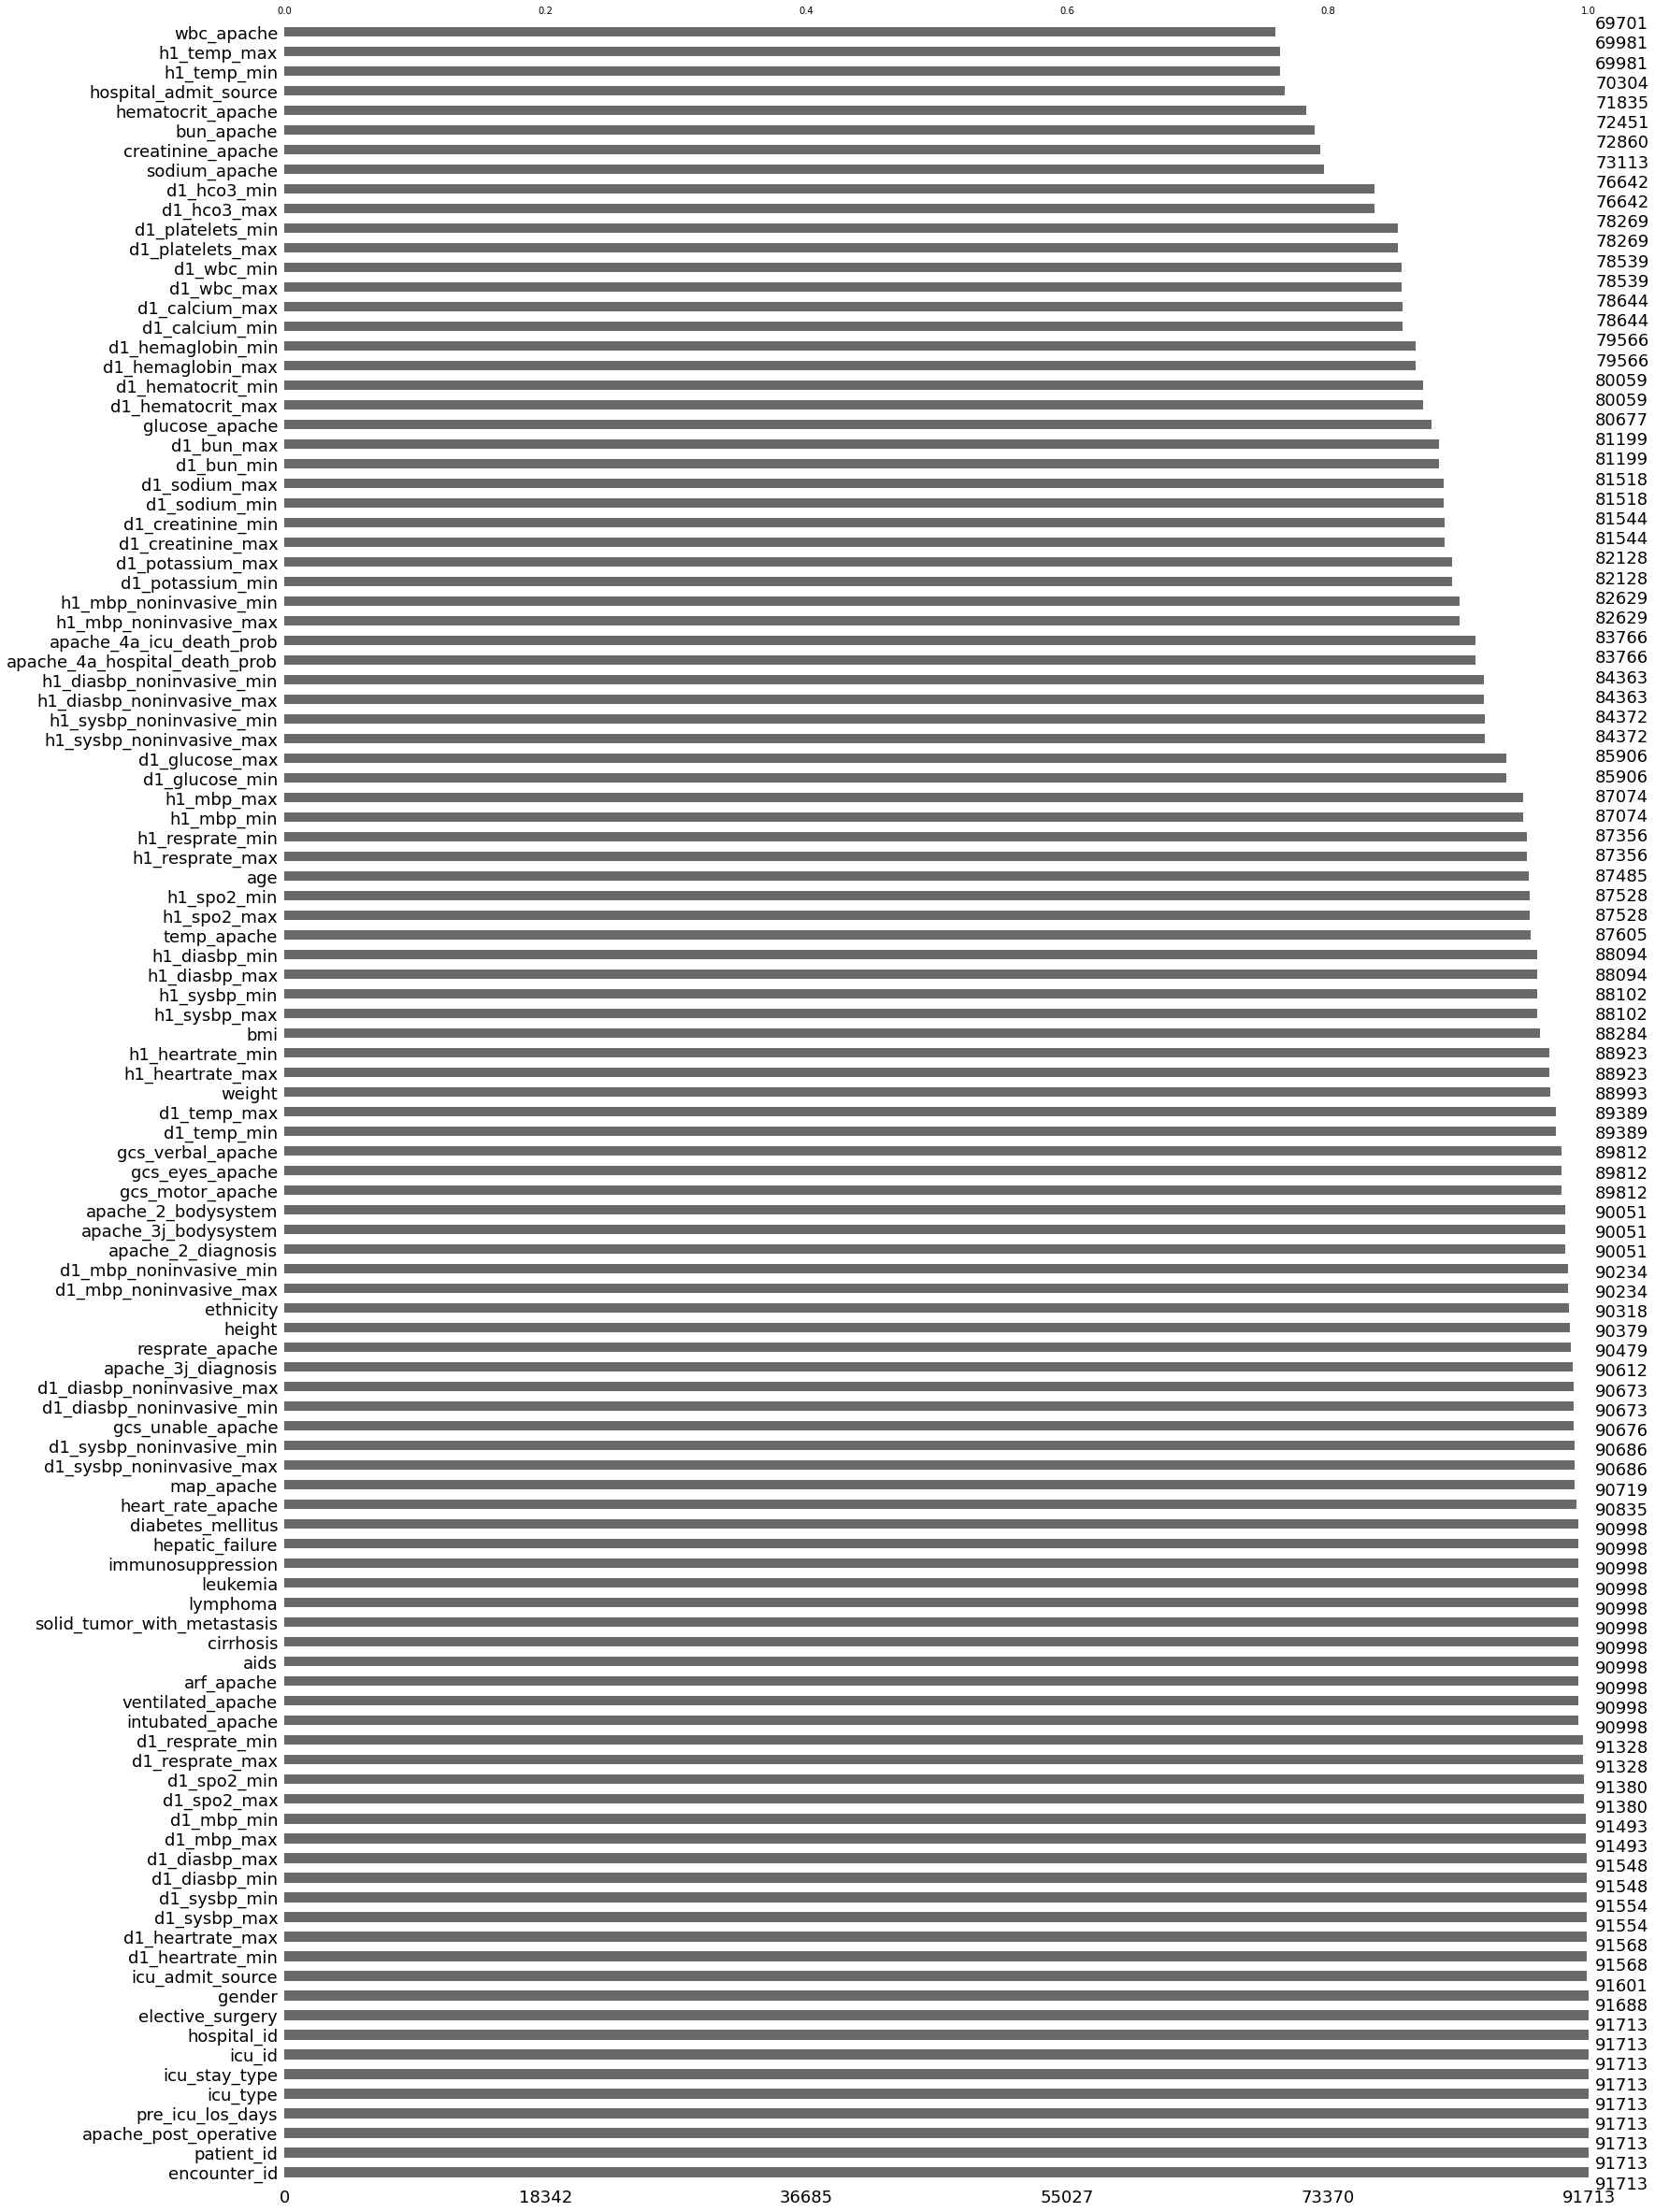

In [59]:
# Now, lets check the distribution of missing values across features
msno.bar(Xmiss, sort='descending', fontsize=18);

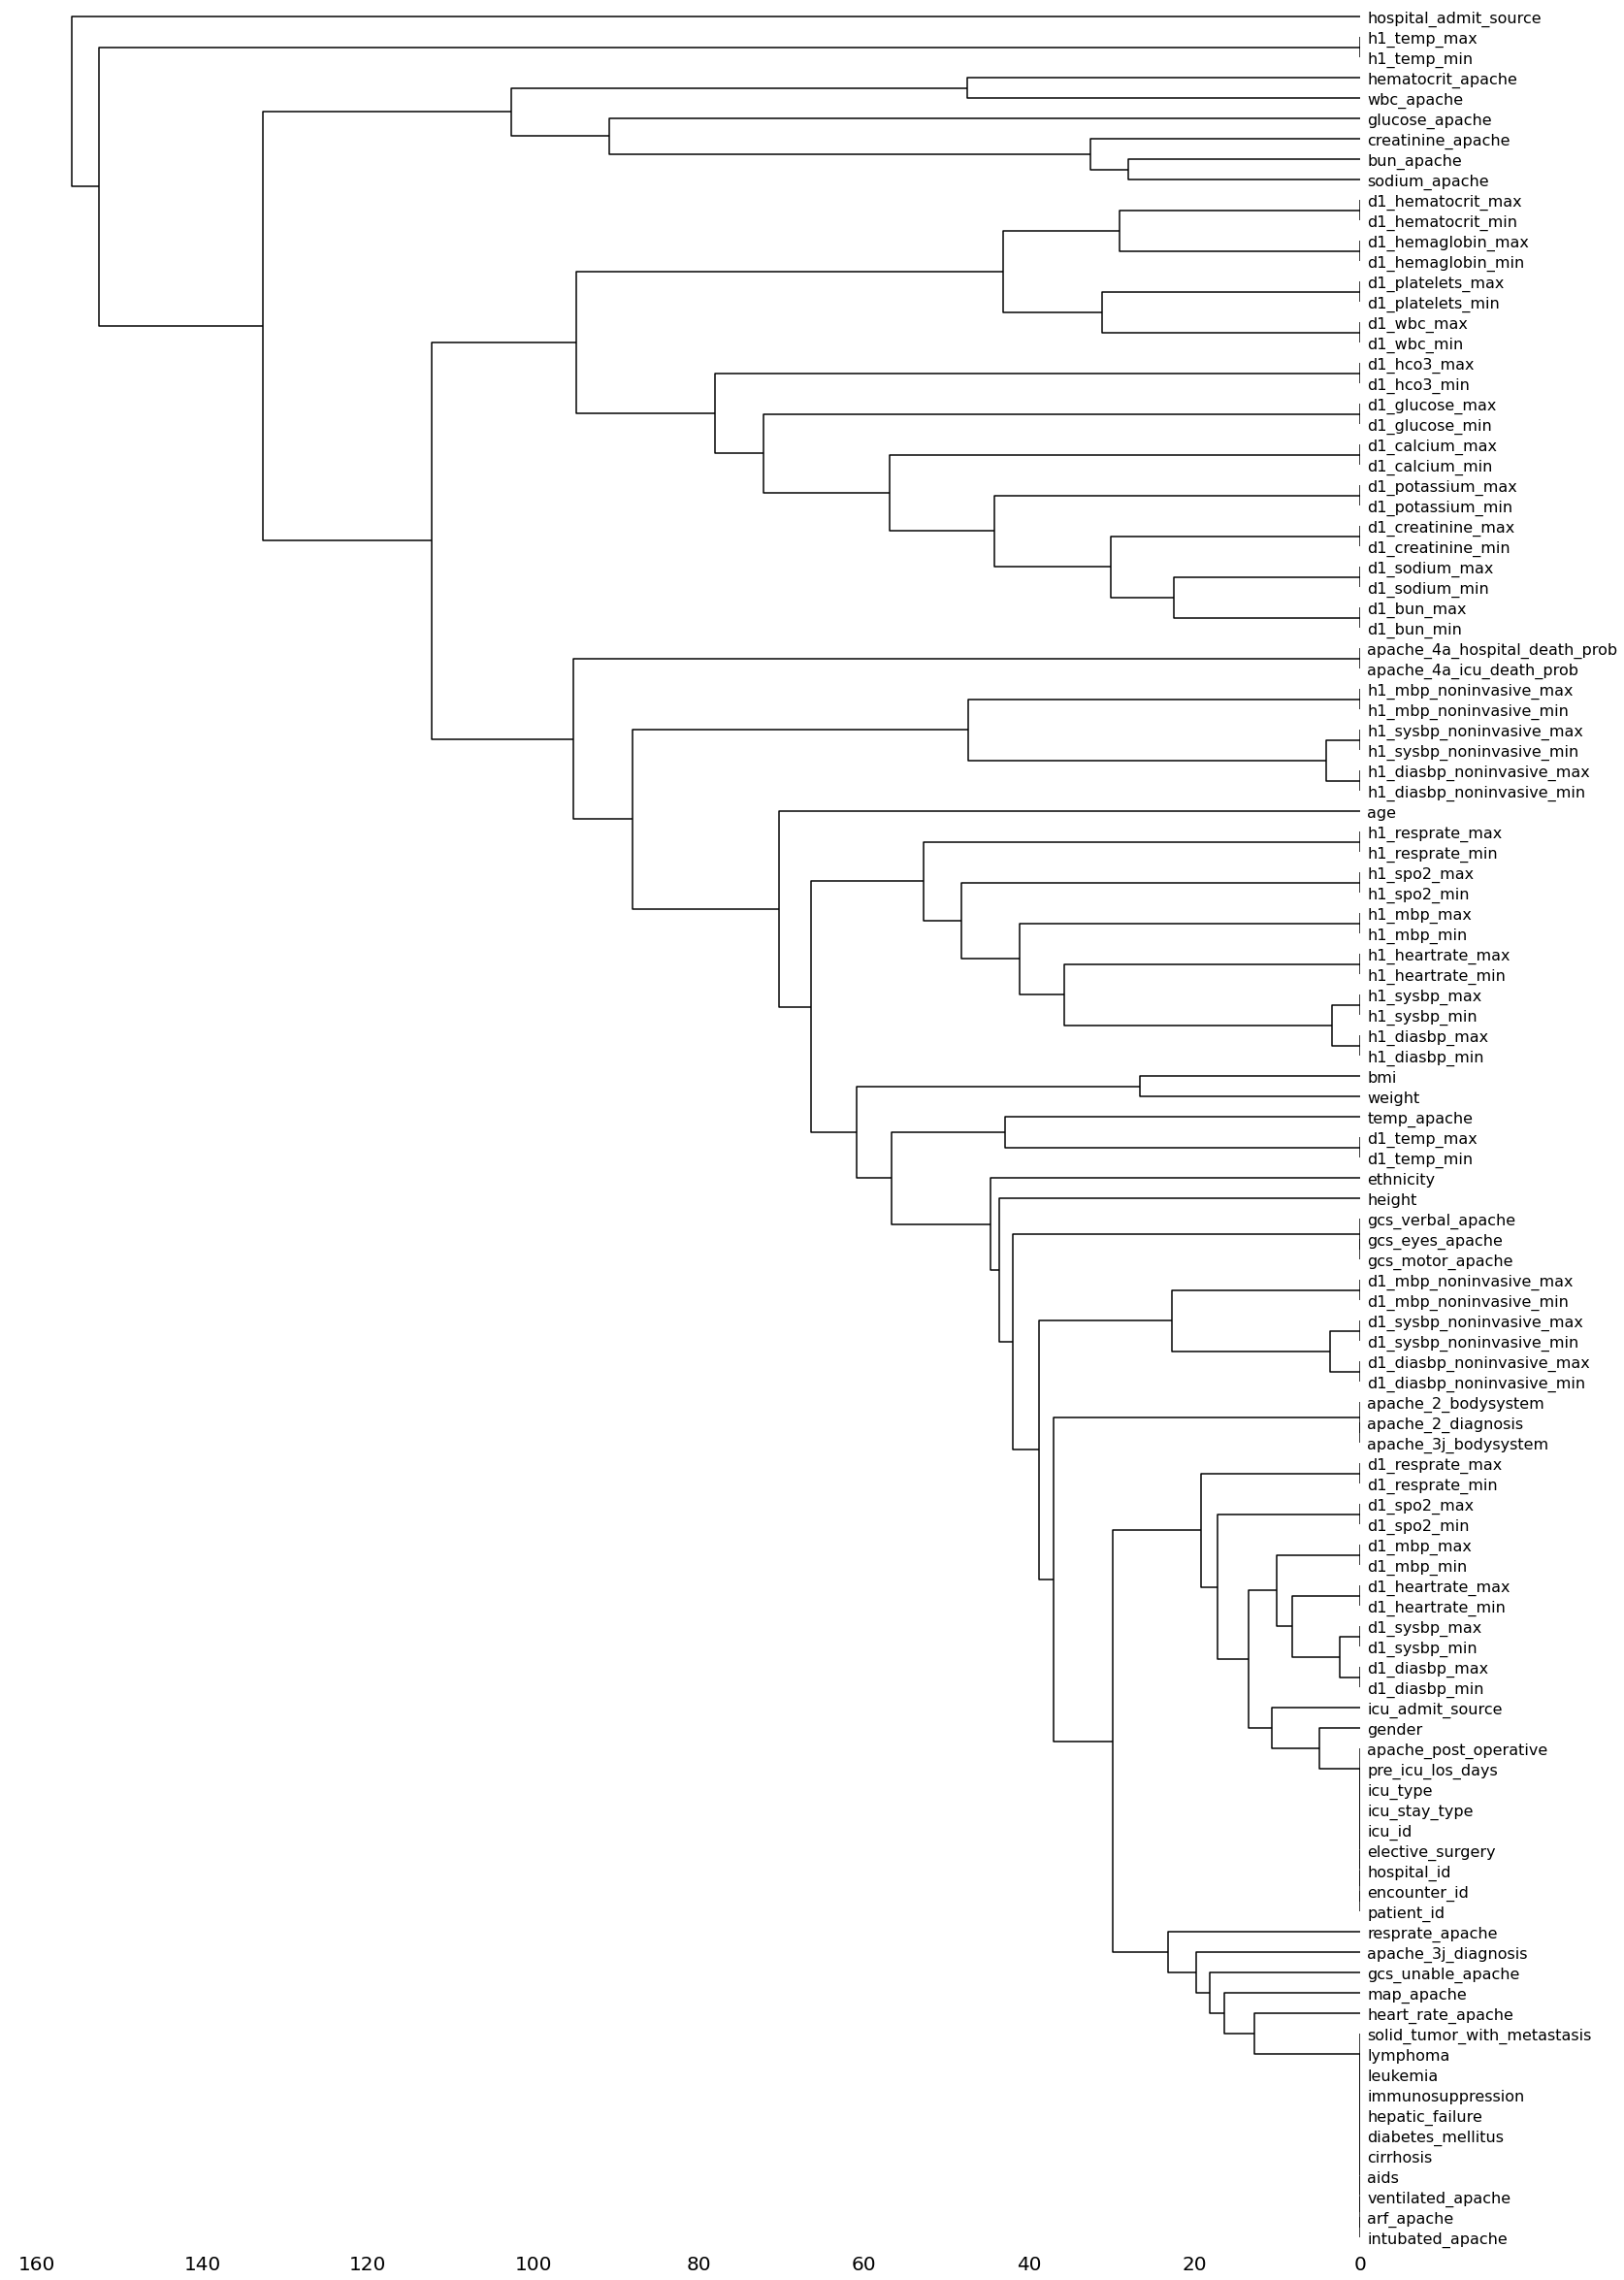

In [60]:
# Checking for any pattern in relationship of missing values
msno.dendrogram(Xmiss);

##### Few interesting observations:
Missing values in the following features show some form of correlation.
* 'heart_rate_apache' and 'lymphoma'
* ('gender' and 'elective_surgery') with 'icu_admit_source'
* 'bmi' and 'weight'  
Let's further look into it.

In [61]:
# Further inspect these features
cols = ['heart_rate_apache', 'lymphoma', 'gender', 'elective_surgery', 'icu_admit_source', 'bmi', 'weight']
for col in cols:
    print(col, "\033[1m Datatype: \033[0m ", Xmiss[col].dtypes)
    print(view_datadict(col), "\n")

heart_rate_apache  Datatype:   float16
The heart rate measured during the first 24 hours which results in the highest APACHE III score in unit: Beats per minute 

lymphoma  Datatype:   float16
Whether the patient has been diagnosed with non-Hodgkin lymphoma. in unit: None 

gender  Datatype:   category
The genotypical sex of the patient in unit: None 

elective_surgery  Datatype:   int8
Whether the patient was admitted to the hospital for an elective surgical operation in unit: None 

icu_admit_source  Datatype:   category
The location of the patient prior to being admitted to the unit in unit: None 

bmi  Datatype:   float16
The body mass index of the person on unit admission in unit: kilograms/metres^2 

weight  Datatype:   float16
The weight (body mass) of the person on unit admission in unit: kilograms 



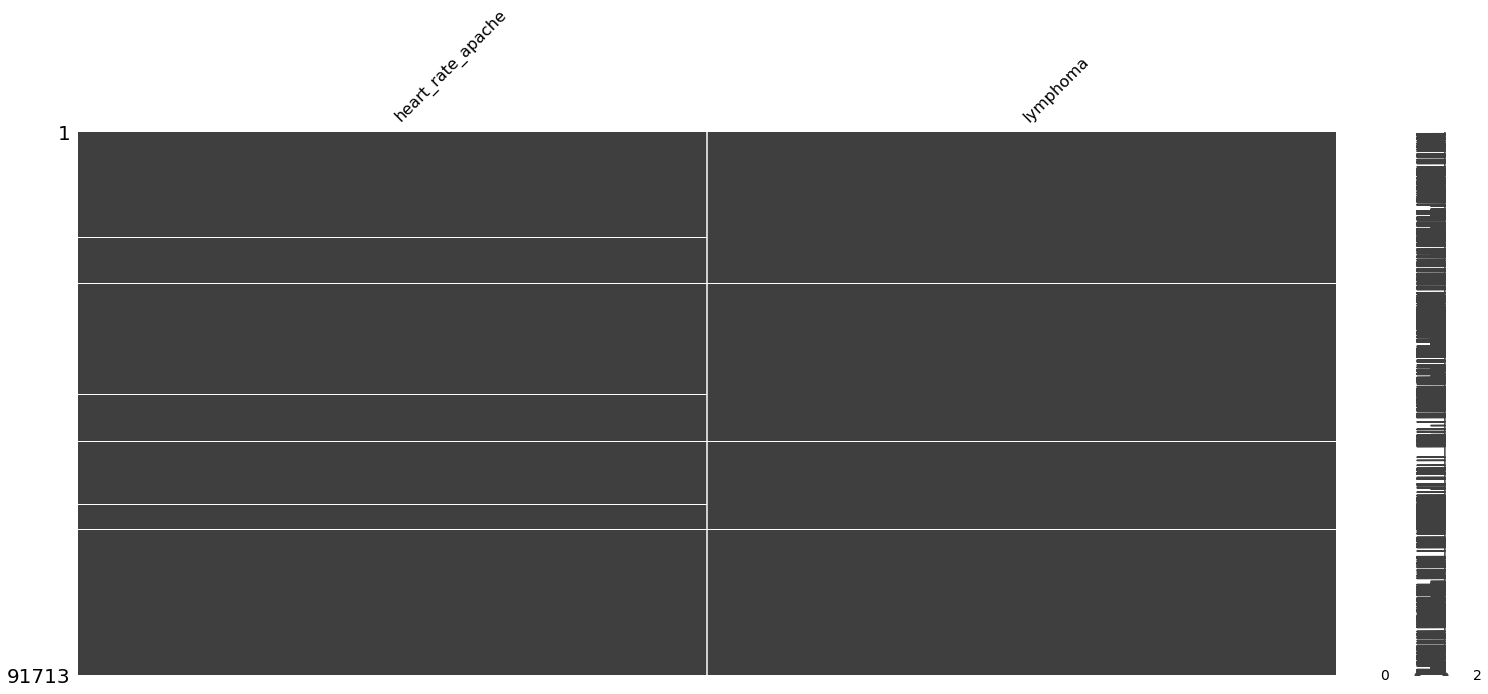

In [62]:
# Checking 'heart_rate_apache' vs 'lymphoma'
msno.matrix(Xmiss[['heart_rate_apache', 'lymphoma']]);

> Missing values in **'heart_rate_apache'** is related to missing values in **'lymphoma'**

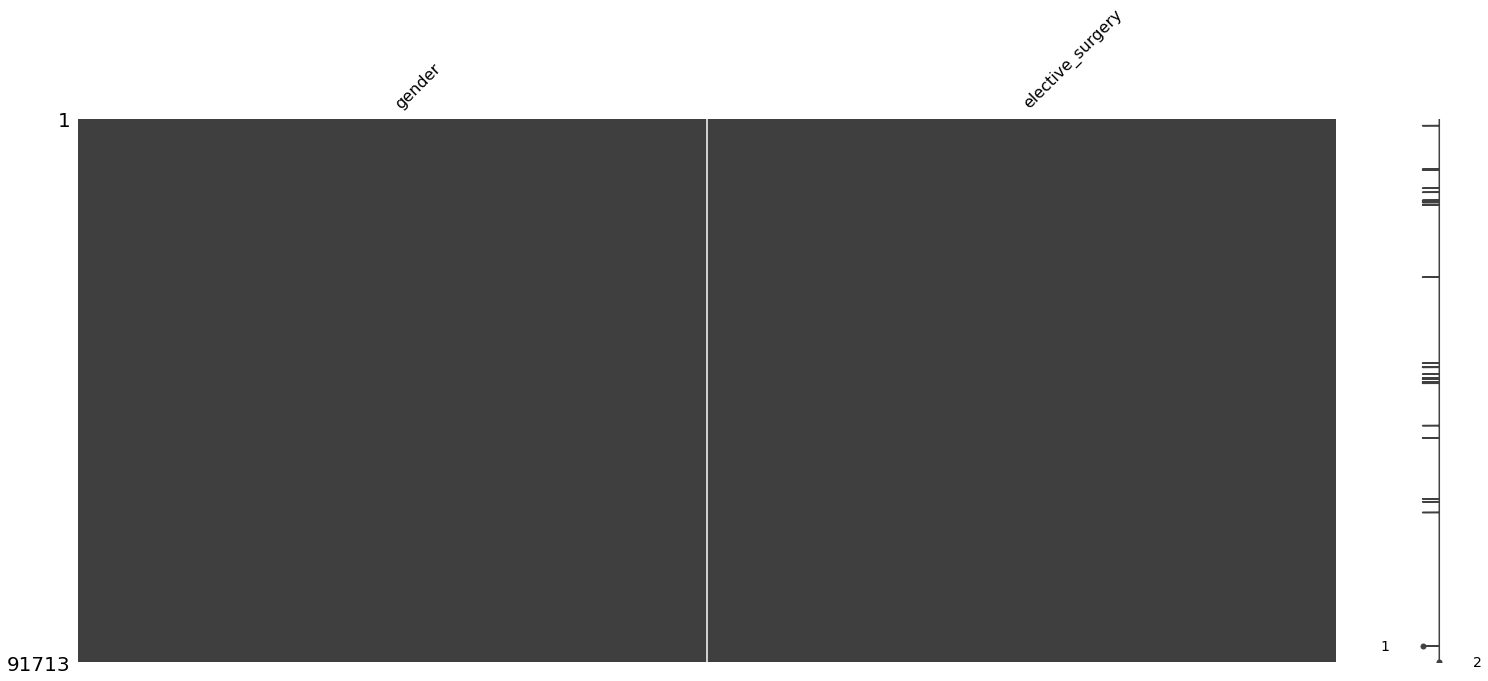

In [63]:
# Checking 'gender' vs 'elective_surgery'
msno.matrix(Xmiss[['gender', 'elective_surgery']]);

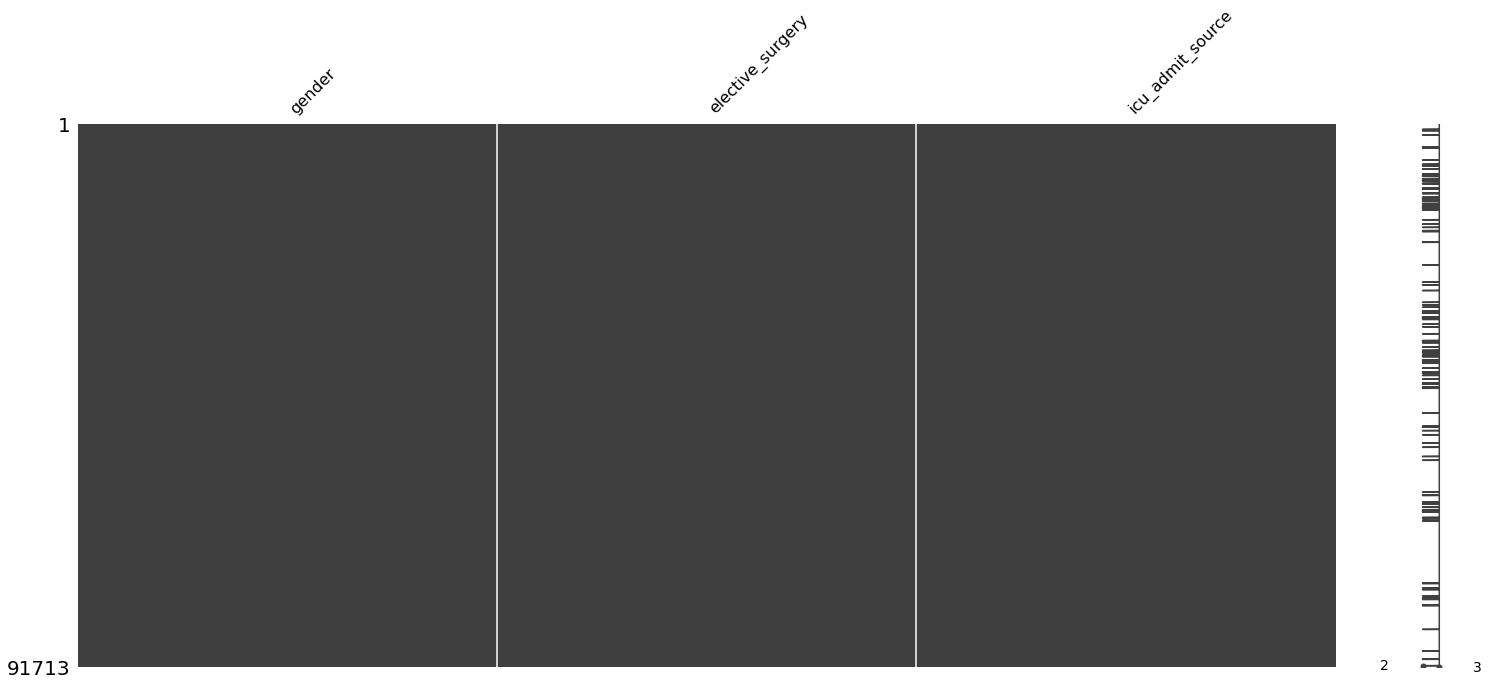

In [64]:
msno.matrix(Xmiss[['gender', 'elective_surgery', 'icu_admit_source']]);

> Failed to visualize any relationship in the missing values in **'gender'**, **'elective_surgery'** and **'icu_admit_source'**.

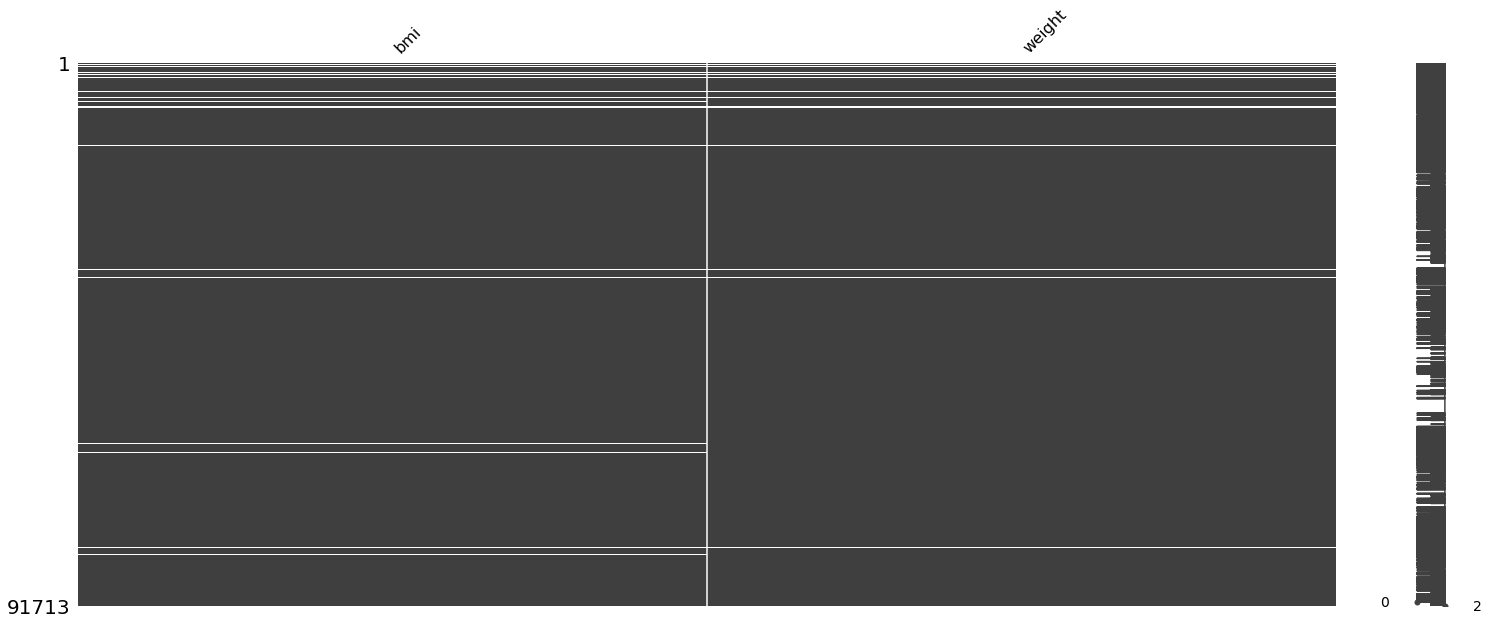

In [65]:
# Checking 'bmi' vs 'weight'
msno.matrix(Xmiss[['bmi', 'weight']]);

We find that some of the missing values in bmi is related to all of the missing values in weight; which is obvious.

Let's plot the heatmap of missing values.

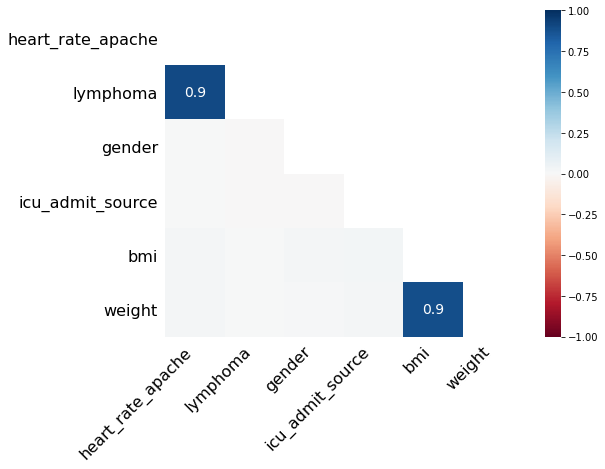

In [66]:
msno.heatmap(Xmiss[cols], figsize=(8,6));

##### Observations:
* Missing values in 'icu_admit_source', 'gender' and 'elective_surgery' are missing completely at random and hence could be dropped.
* Missing values in ('heart_rate_apache' and 'lymphoma') and ('bmi' and 'weight') are not missing completely at random. Hence, we can drop the observations with missing values in these features provided the missing value % does not exceed 1%.

In [67]:
# Checking % missing values in 'icu_admit_source', 'gender', 'elective_surgery'
X[['icu_admit_source', 'gender', 'elective_surgery']].isnull().sum()*100/X.shape[0]

icu_admit_source    0.122120
gender              0.027259
elective_surgery    0.000000
dtype: float64

In [68]:
# dropping rows with missing features in 'icu_admit_source', 'gender', 'elective_surgery'
df = pd.concat([X, y], axis=1)
df.loc[:,['icu_admit_source', 'gender', 'elective_surgery']].dropna(axis=0, inplace=True)

In [69]:
# Separating X and y
y = df['hospital_death']
X = df.drop(columns=['hospital_death'], axis=1)
print(X.shape, y.shape)

(91713, 184) (91713,)


In [70]:
# Checking whether ('heart_rate_apache' and 'lymphoma') and ('bmi' and 'weight') has any relationship 
# with features without any missing values

nonmiss = [col for col in X if X[col].isnull().sum()==0]
Xnonmiss = X[nonmiss]
Xnonmiss.head()

encounter_id  patient_id  hospital_id  elective_surgery  icu_id  \
0         66154       25312          118                 0      92   
1        114252       59342           81                 0      90   
2        119783       50777          118                 0      93   
3         79267       46918          118                 1      92   
4         92056       34377           33                 0      91   

  icu_stay_type      icu_type  pre_icu_los_days  apache_post_operative  
0         admit         CTICU          0.541504                      0  
1         admit  Med-Surg ICU          0.927734                      0  
2         admit  Med-Surg ICU          0.000694                      0  
3         admit         CTICU          0.000694                      1  
4         admit  Med-Surg ICU          0.073608                      0

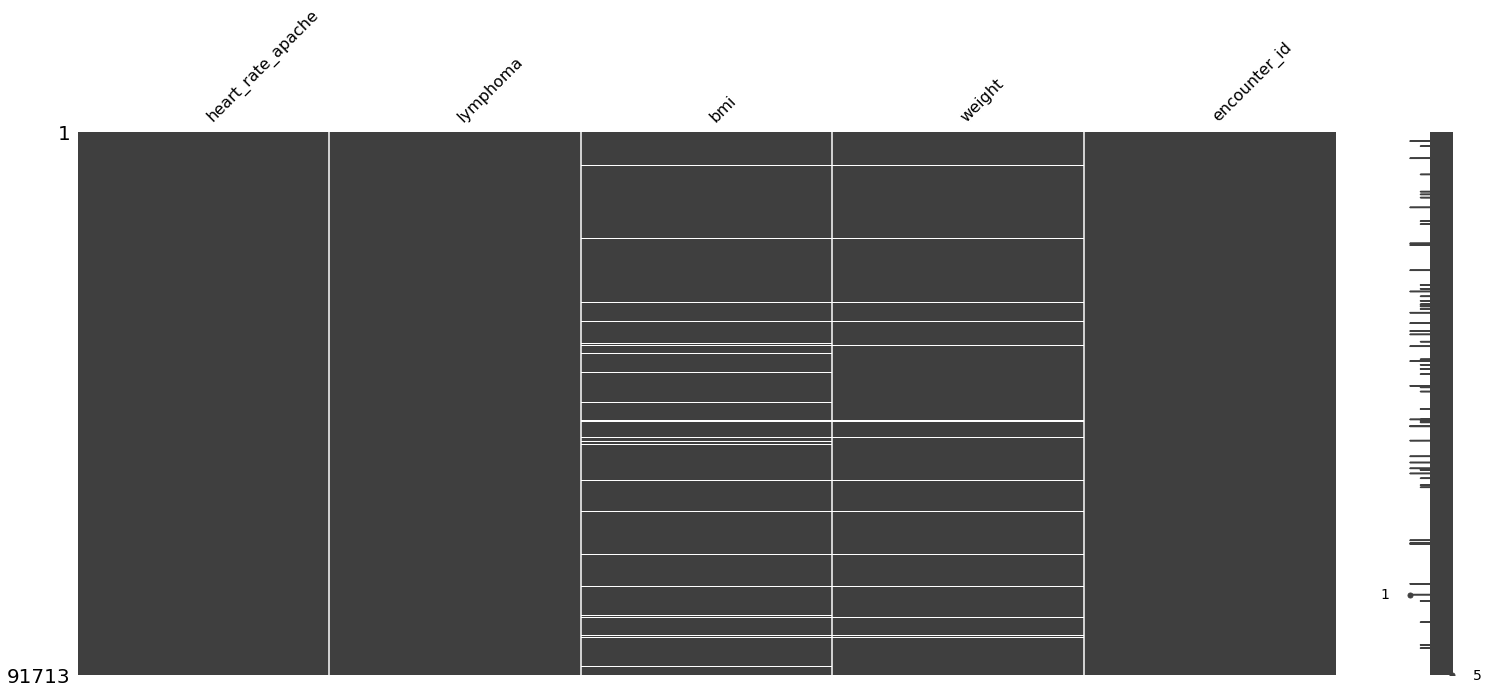

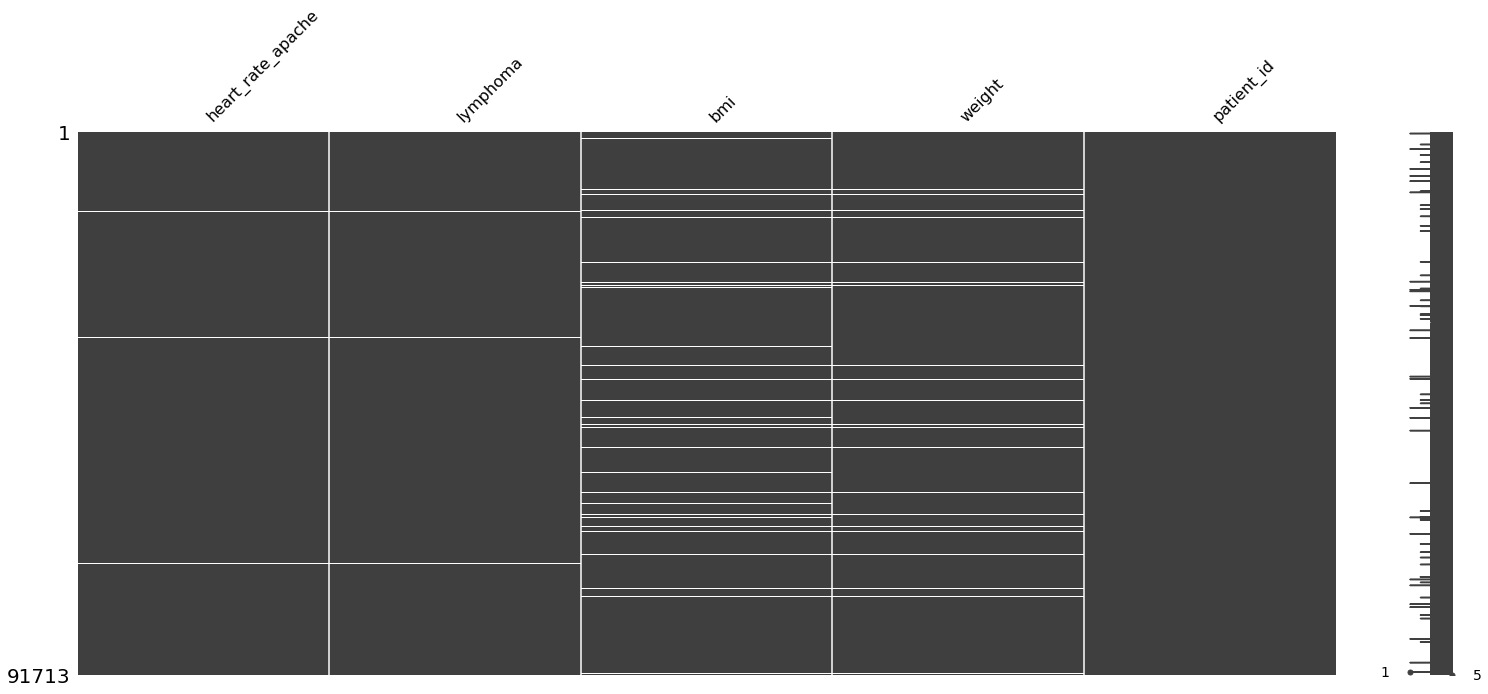

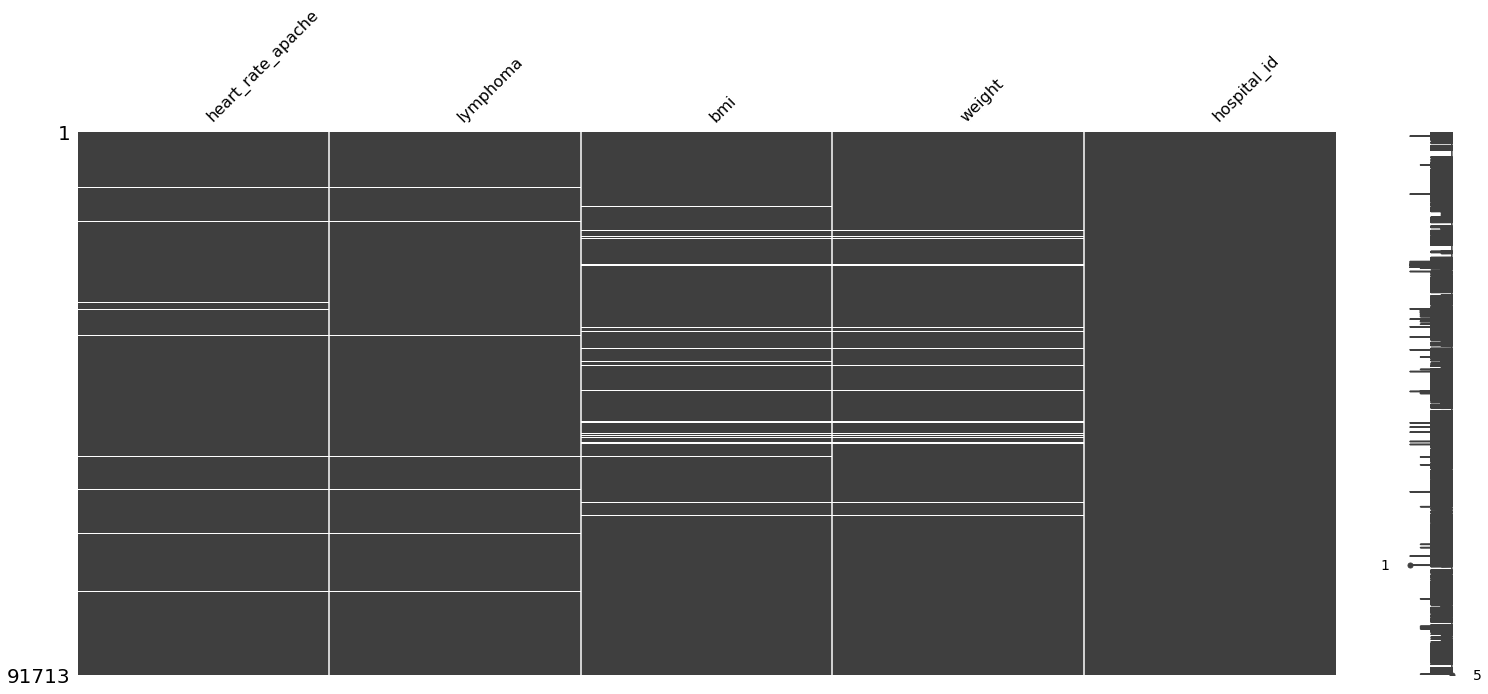

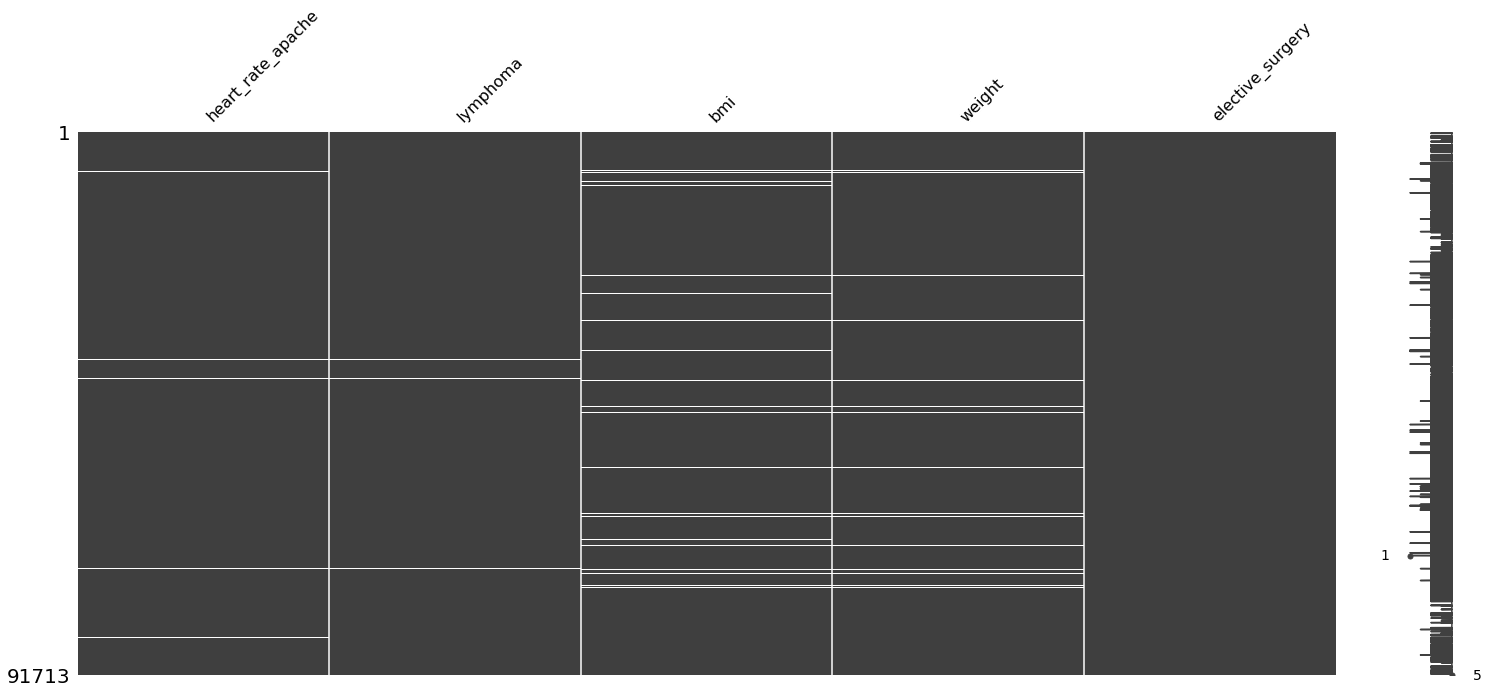

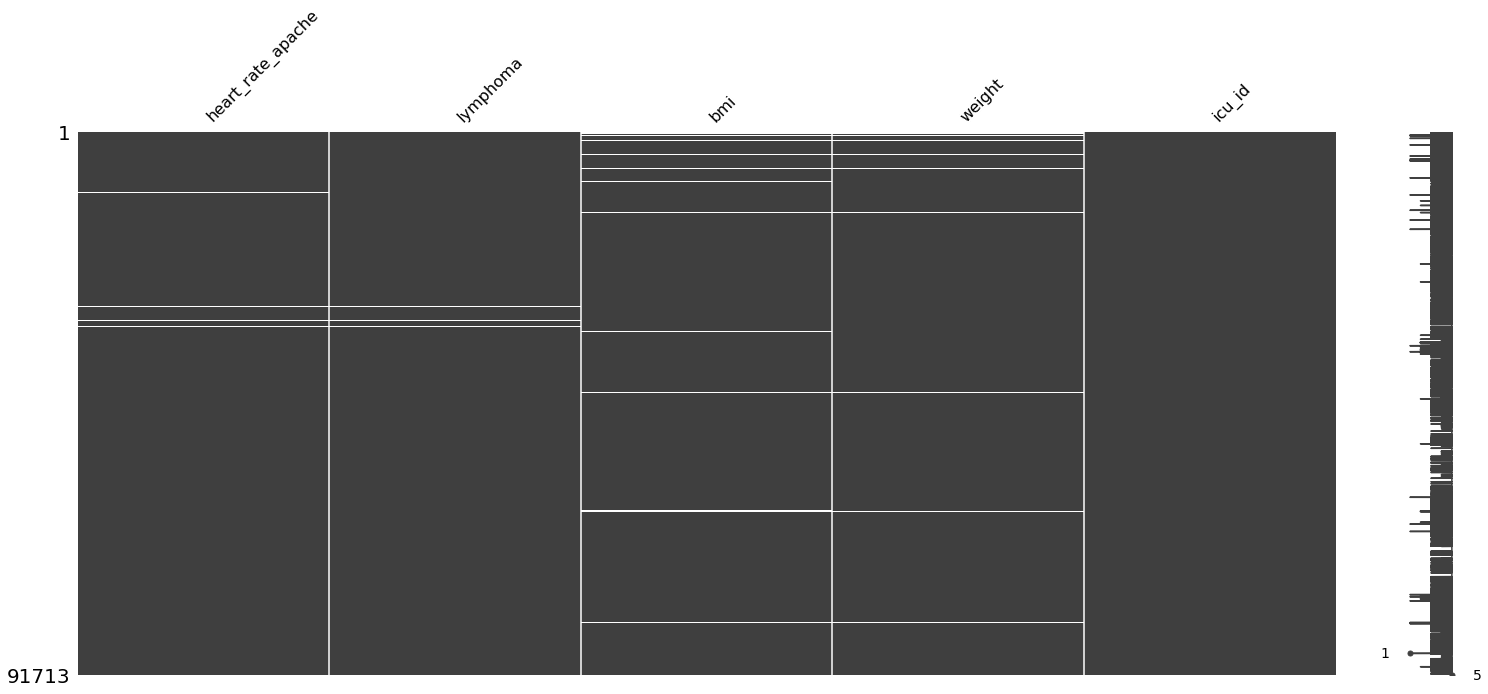

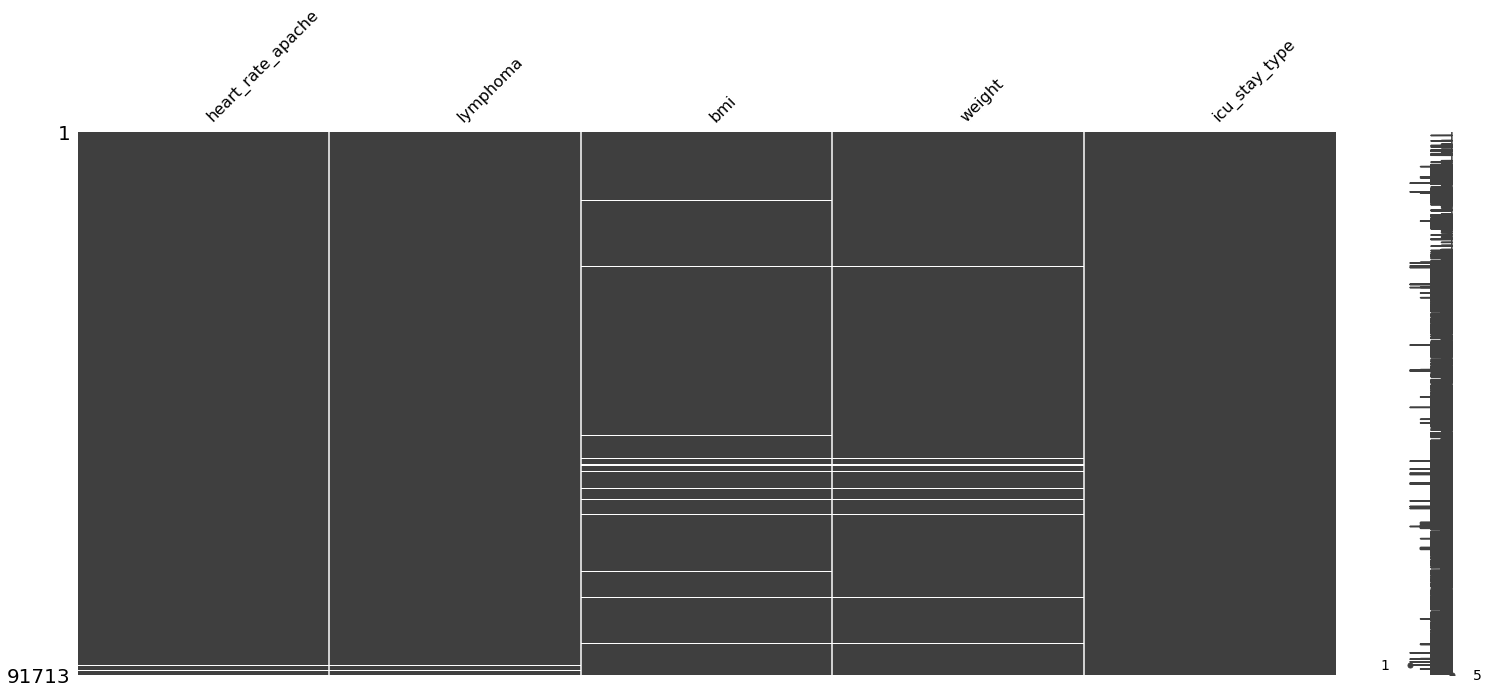

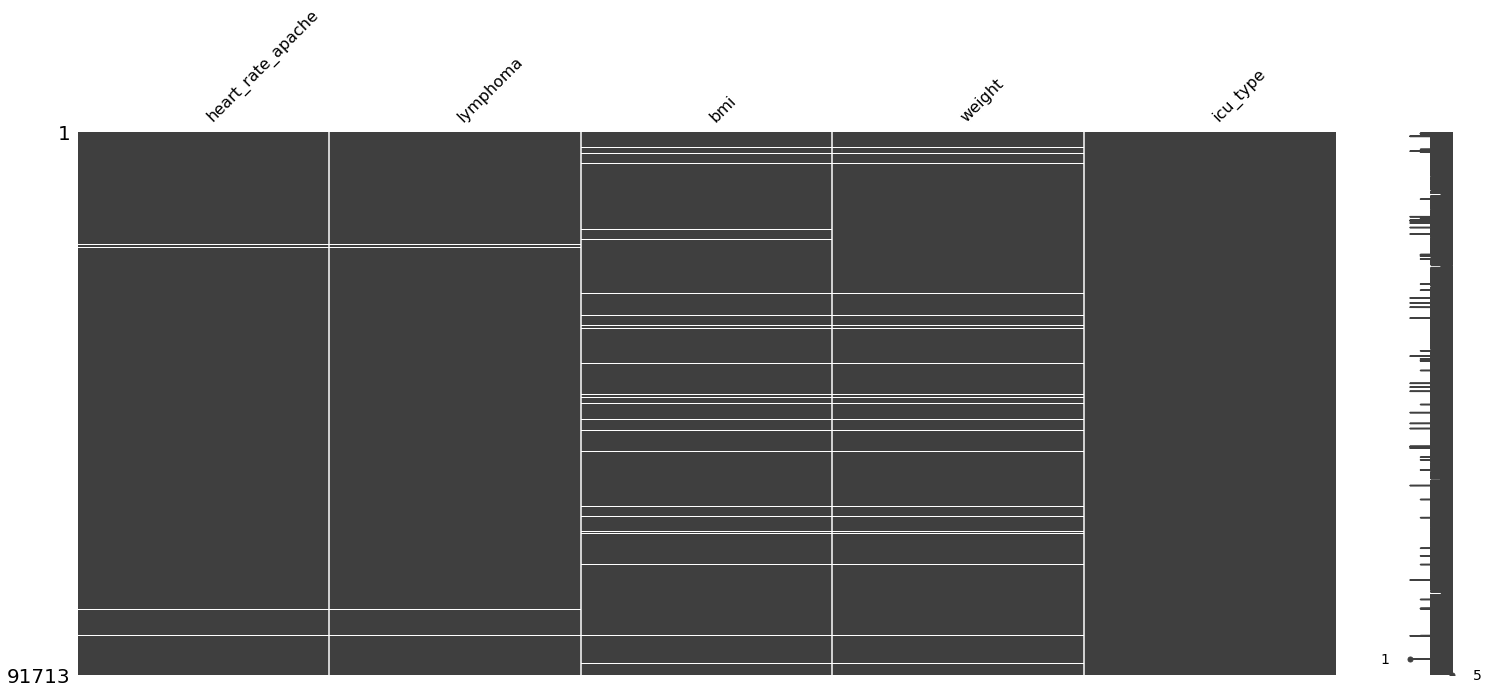

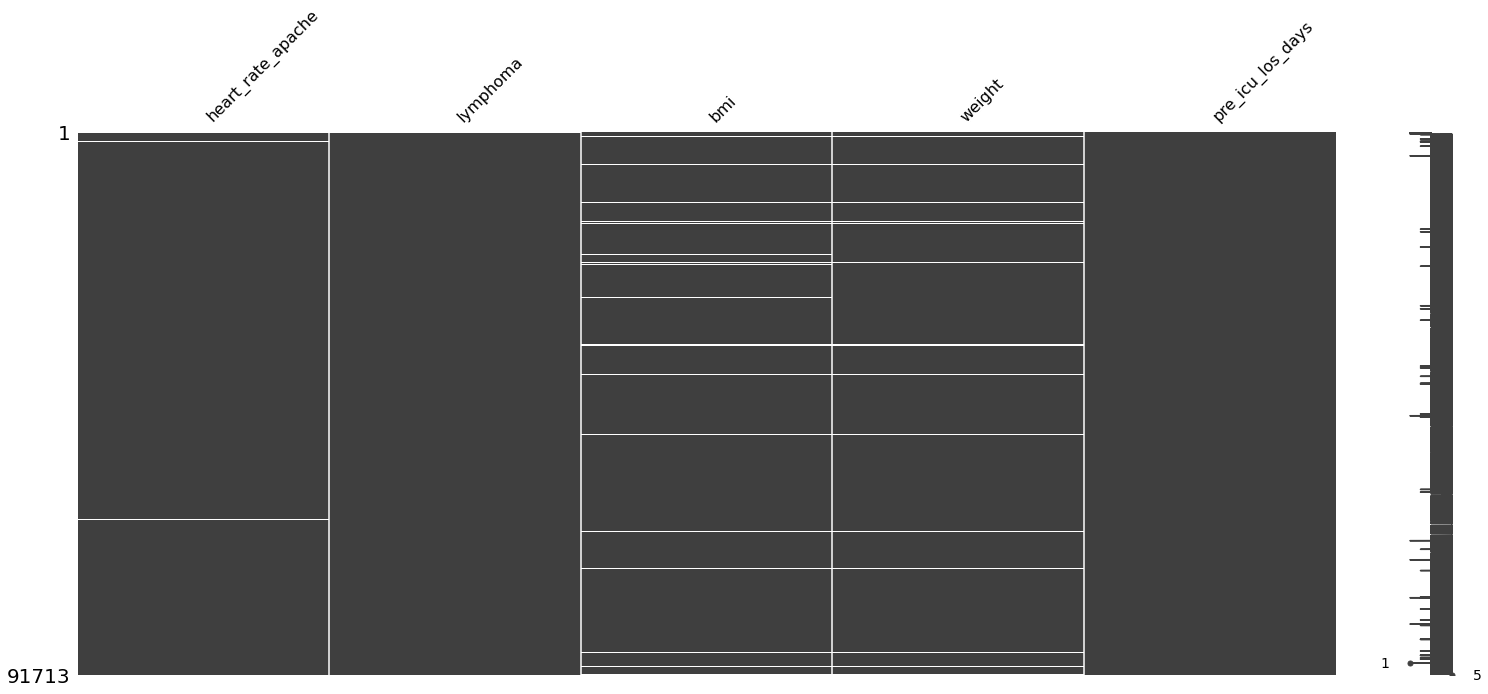

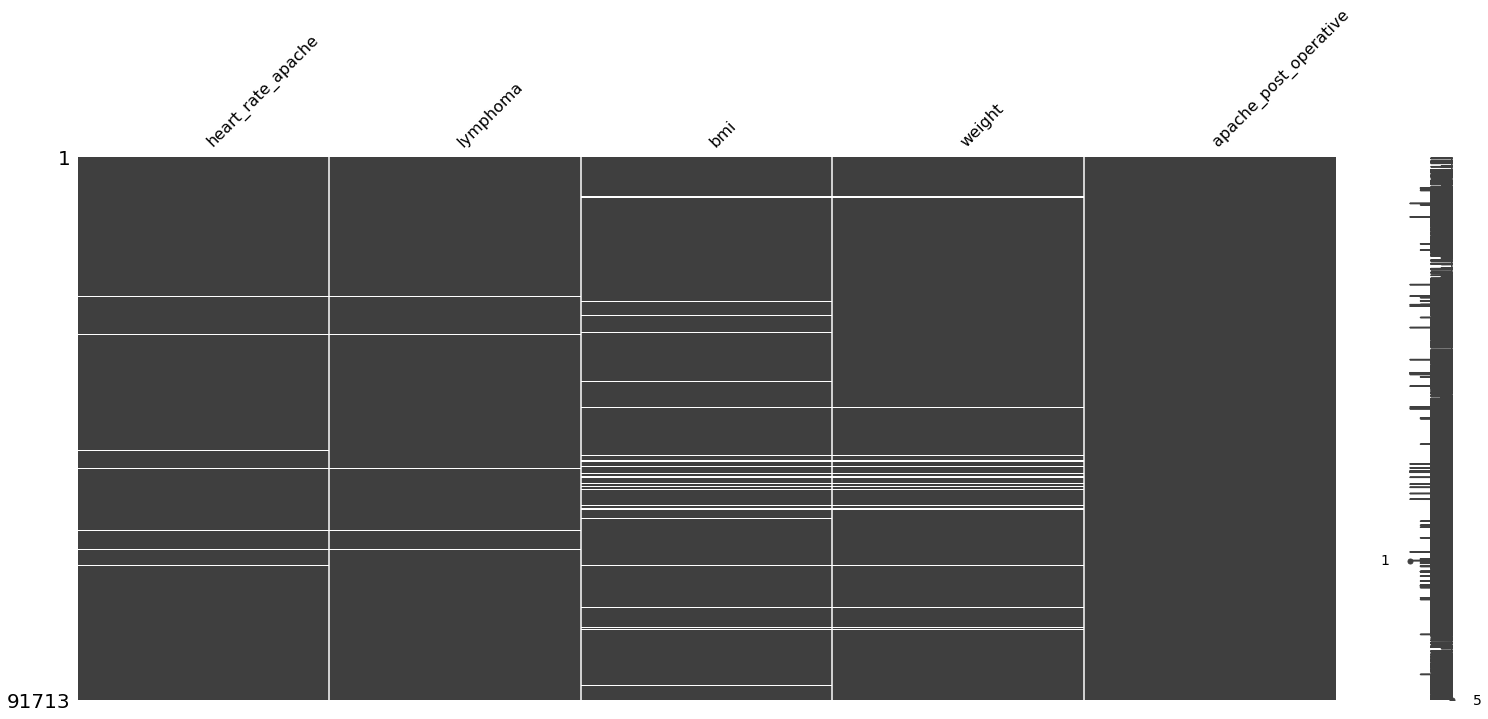

In [71]:
# creating a new dataframe with missing features
X1miss = X[['heart_rate_apache','lymphoma', 'bmi', 'weight']]

# iterating over nonmissing features to find any relationship with missing features
for feat in nonmiss:
    msno.matrix(pd.concat([X1miss, X[feat]], axis=1).sort_values(feat))

No strong relationship could be found except for a faint one for 'icu_stay_type' and 'icu_type' with 'heart_rate_apache' and 'lymphoma'
Hence, we can drop the missing values in these features.

In [72]:
# dropping rows with missing features 
df = pd.concat([X, y], axis=1)
df = df.dropna(subset=['heart_rate_apache', 'lymphoma', 'bmi', 'weight'], how='all')

In [73]:
# Separating X and y
y = dataset['hospital_death']
X = dataset.drop(columns=['hospital_death'], axis=1)
print(X.shape, y.shape)

(91713, 184) (91713,)


In [74]:
# Checking missing values
X.isnull().mean().sort_values(ascending=False)*100

h1_bilirubin_min         92.265001
h1_bilirubin_max         92.265001
h1_lactate_min           91.992411
h1_lactate_max           91.992411
h1_albumin_min           91.398166
                           ...    
icu_stay_type             0.000000
icu_type                  0.000000
pre_icu_los_days          0.000000
apache_post_operative     0.000000
encounter_id              0.000000
Length: 184, dtype: float64

In [75]:
# dropping features with missing values > 0.5
thresh = len(Xmiss)*0.5
X.dropna(axis=1, thresh=thresh, inplace=True)

# Checking missing values
X.isnull().mean().sort_values(ascending=False)*100

wbc_apache               24.000960
h1_temp_max              23.695659
h1_temp_min              23.695659
hospital_admit_source    23.343474
hematocrit_apache        21.674136
                           ...    
icu_stay_type             0.000000
icu_type                  0.000000
pre_icu_los_days          0.000000
apache_post_operative     0.000000
encounter_id              0.000000
Length: 110, dtype: float64

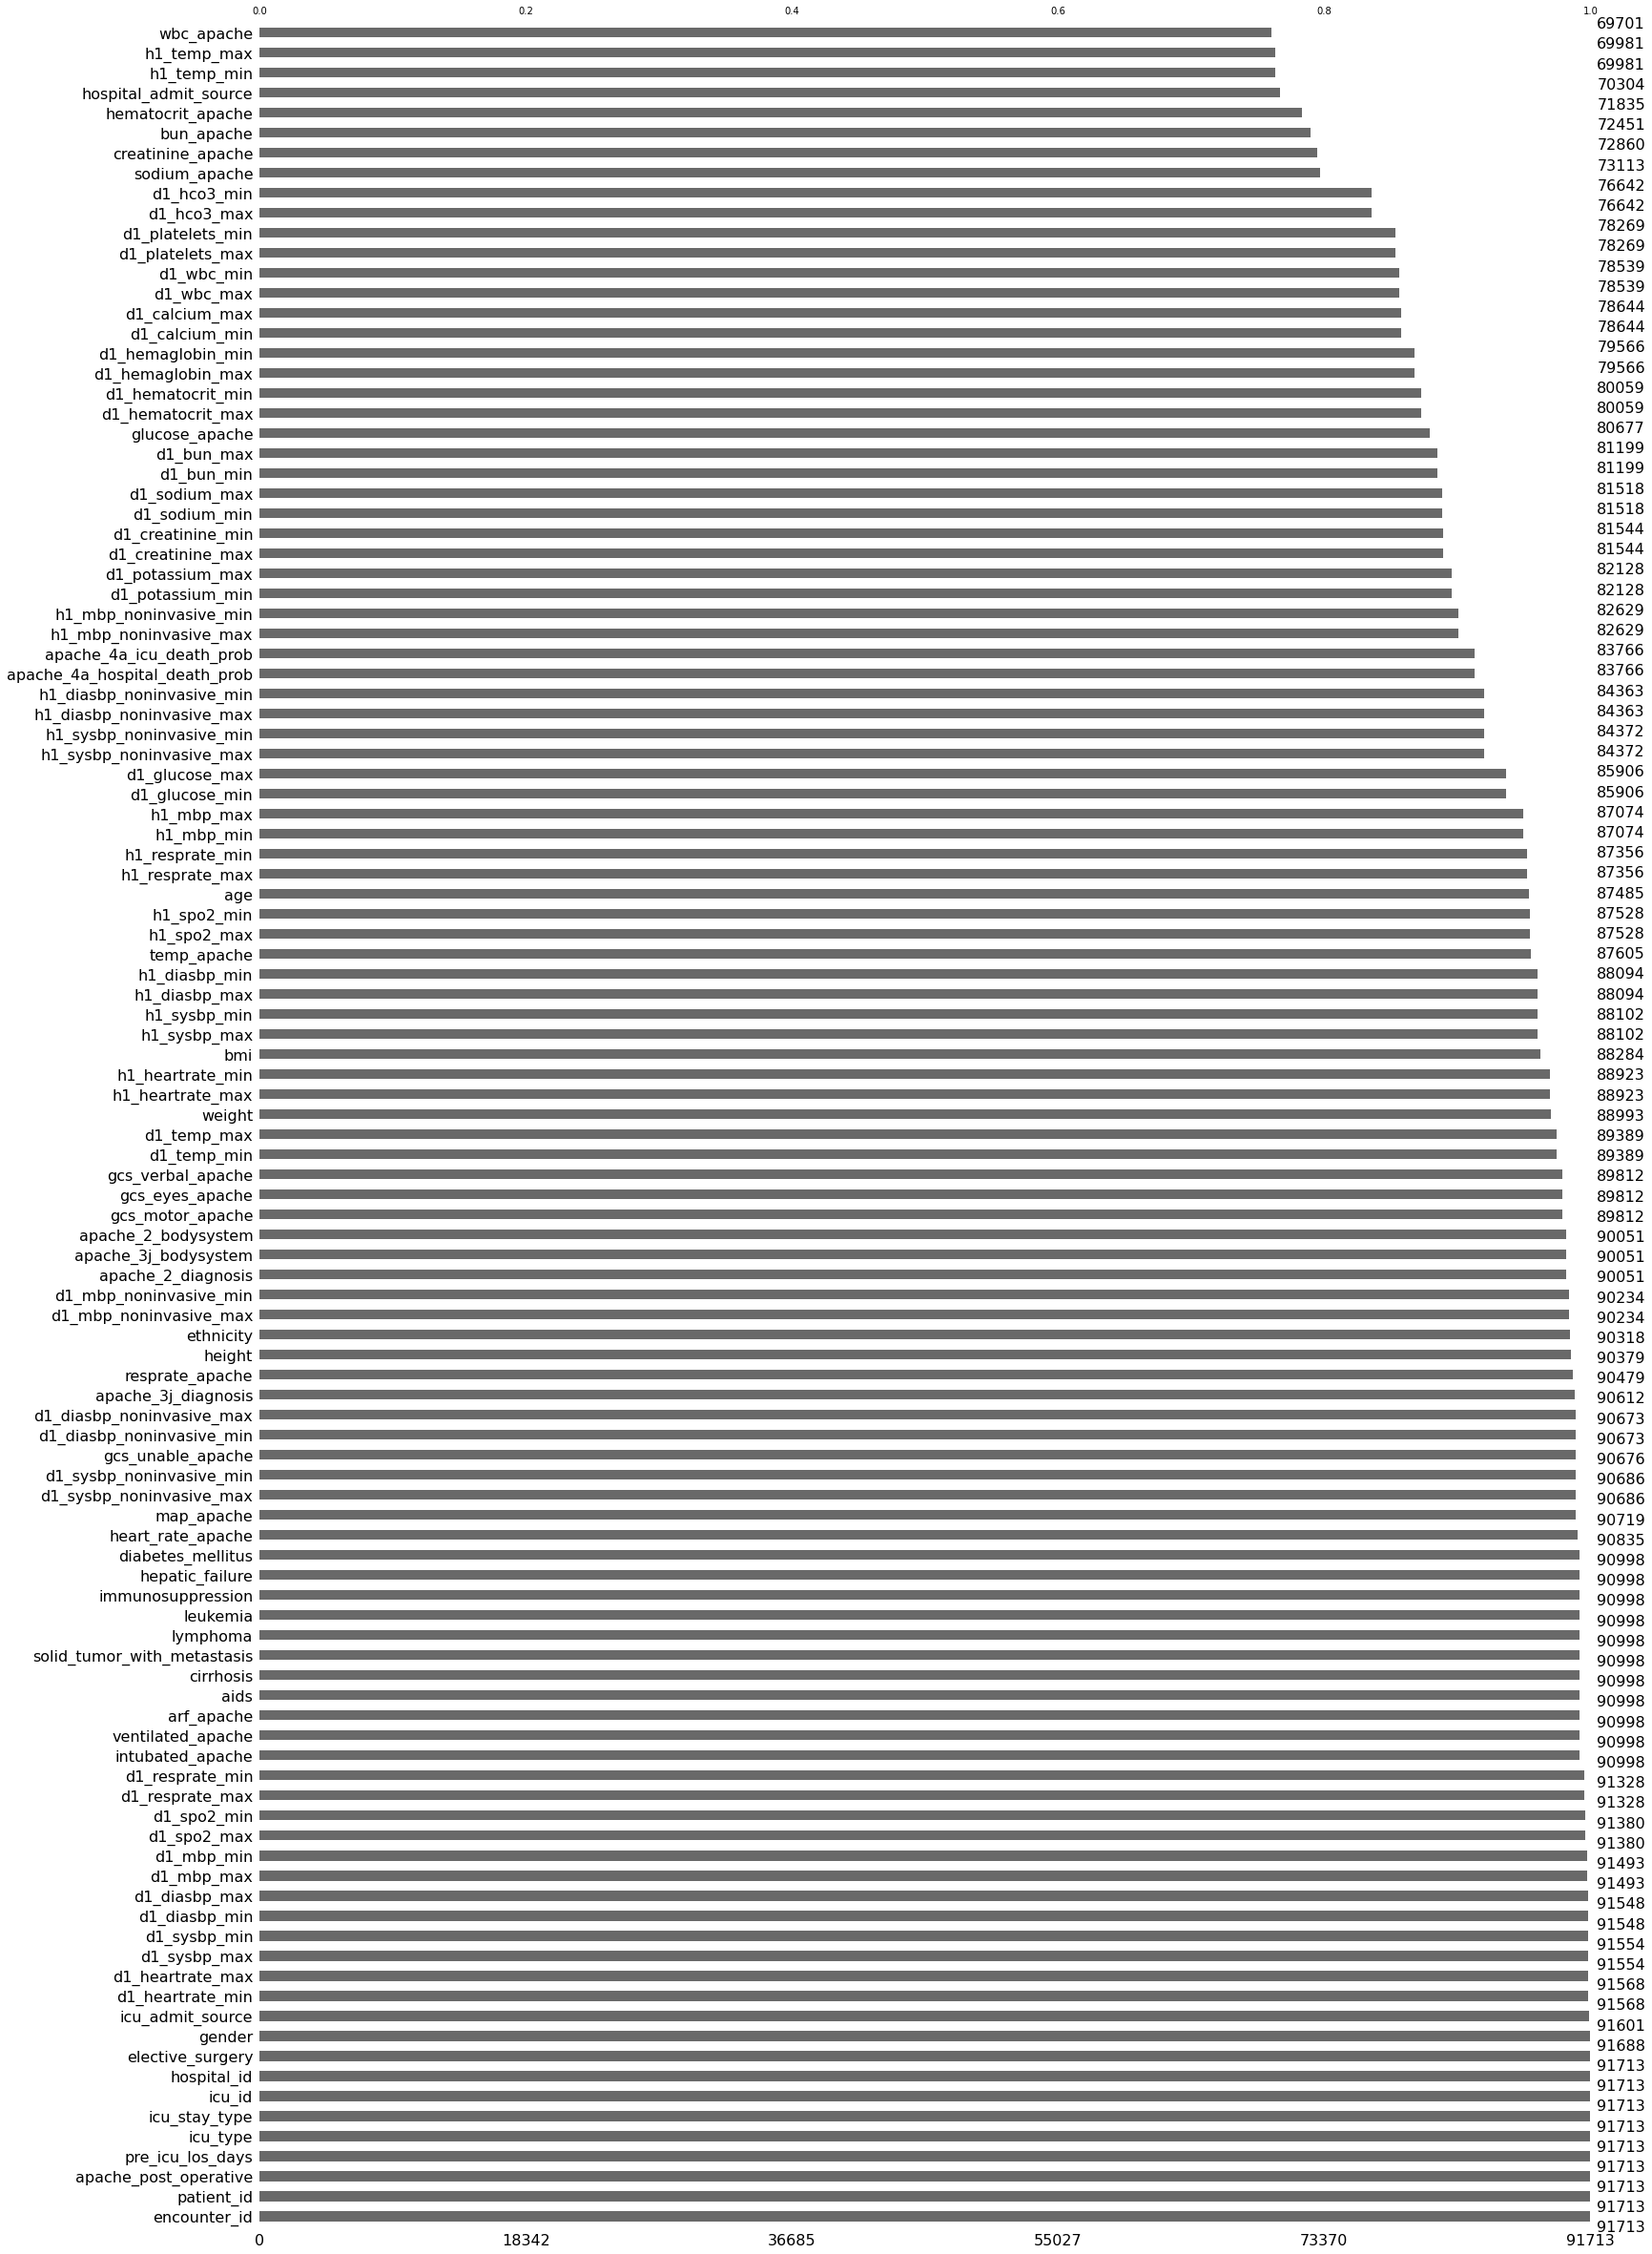

In [76]:
msno.bar(X, sort='descending');

In [77]:
# imputing missing values with mean and mode
for col in X:
    if X[col].dtypes in ['int64', 'float64']:
        X[col] = X[col].fillna(X[col].mean())
    else:
        X[col] = X[col].fillna(X[col].mode()[0])

In [78]:
X.isnull().sum().sort_values(ascending=False)

encounter_id           0
h1_spo2_min            0
d1_creatinine_max      0
d1_calcium_min         0
d1_calcium_max         0
                      ..
temp_apache            0
sodium_apache          0
resprate_apache        0
map_apache             0
apache_2_bodysystem    0
Length: 110, dtype: int64

# Feature Transformation

In [79]:
Xnum = X.select_dtypes(['int', 'float'])
Xnum.shape

(91713, 2)

In [80]:
Xcat = X[[col for col in X if col not in Xnum]]
Xcat.shape

(91713, 108)

In [81]:
# Updating positively skewed features
pos_skew = [feat for feat in pos_skew if feat in Xnum.columns]
pos_skew

[]

In [82]:
# Updating negatively skewed features
neg_skew = [feat for feat in neg_skew if feat in Xnum.columns]
neg_skew

[]

In [83]:
# Visualizing the distribution of positively skewed features
Xnum[pos_skew].hist(figsize=(15,16));

ValueError: hist method requires numerical or datetime columns, nothing to plot.

In [ ]:
# Checking for features with negative or 0 values
negativefeats = []
for feat in Xnum[pos_skew].columns:
    if Xnum[feat].min() <= 0:
        negativefeats.append(feat)
        
print(negativefeats)

In [ ]:
for feat in negativefeats:
    print("\033[1m", feat,"\033[0m:", view_datadict(feat), "\n")

In [ ]:
# Plotting boxplots in the negative range
plt.subplots(1,2, figsize=(16,4))
ax1 = plt.subplot(1,2,1)
sns.boxplot(x=Xnum['pre_icu_los_days']);
plt.xlim(-30,5)
ax2 = plt.subplot(1,2,2)
sns.boxplot(x=Xnum['h1_resprate_min']);
plt.xlim(-5,5)
plt.show()

Since days cannot be negative, negative values in 'pre_icu_los_days' might be an entry error.

In [ ]:
# Converting all negative values to 0
Xnum.loc[:,'pre_icu_los_days'] = np.where(Xnum.loc[:,'pre_icu_los_days']<0, 0, Xnum.loc[:,'pre_icu_los_days'])

In [ ]:
# Plotting boxplots in the negative range
plt.subplots(1,2, figsize=(16,4))
ax1 = plt.subplot(1,2,1)
sns.boxplot(x=Xnum['pre_icu_los_days']);
ax2 = plt.subplot(1,2,2)
sns.boxplot(x=Xnum['h1_resprate_min']);
plt.show()

In [ ]:
# Applying log transformation on positively skewed numerical features
for feat in Xnum[pos_skew]:
    Xnum.loc[:, feat] = np.log1p(Xnum.loc[:, feat])

In [ ]:
# Visualizing the distribution of positively skewed features
Xnum[pos_skew].hist(figsize=(15,16));

In [ ]:
%%time
# plotting boxplots
boxplots(Xnum[pos_skew], size=(15, 60), layout=(40,4), )

In [ ]:
# Saving Xnum
Xnum.to_csv('Xnum.csv')

In [ ]:
# Treating outliers through winsorizing
for feat in pos_skew:    
    q1 = Xnum.loc[:,feat].quantile(0.25)
    q3 = Xnum.loc[:,feat].quantile(0.75)
    iqr = q3 - q1
    upper = q3+(1.5*iqr)
    lower = q1-(1.5*iqr)
    Xnum.loc[:,feat] = np.where(Xnum.loc[:,feat]>upper, upper, np.where(Xnum.loc[:,feat]<lower, lower, Xnum.loc[:,feat]))

In [ ]:
%%time
# plotting boxplots
boxplots(Xnum[pos_skew], size=(15, 60), layout=(40,4), )

In [ ]:
# Visualizing negatively skewed features
Xnum[neg_skew].hist(layout=(2,5), figsize=(16,6));

In [ ]:
# Binarizing negatively skewed features
for feat in neg_skew:
    med = Xnum[feat].median()
    Xnum[feat] = np.where(Xnum[feat]>=med, "High", "Low")

In [ ]:
# Plotting negatively skewed features
plt.figure(figsize=(16,6))
plotnumber = 1

for col in neg_skew:
    if plotnumber < 11:
        ax1 = plt.subplot(2,5,plotnumber)
        sns.countplot(x=Xnum[col], hue=y, palette=['MediumSeaGreen', 'Tomato'])
        plt.title(f"{col}")
        plt.xlabel('')
        plt.ylabel('')
    plotnumber +=1
plt.tight_layout()

In [ ]:
# Concatenating binarized negatively skewed features along with categorical features
Xcat = pd.concat([Xcat, Xnum[neg_skew]], axis=1)
Xcat.head()

In [ ]:
# Dropping negatively skewed features from numerical features
Xnum = Xnum.drop(columns=neg_skew, axis=1)

In [ ]:
# Converting Xcat features to type 'category'
for feat in Xcat.columns:
    Xcat[feat] = Xcat[feat].astype('category')

In [ ]:
# dropping all id features from Xcat
idcols = ['encounter_id', 'patient_id', 'hospital_id', 'icu_id']
Xcat.drop(columns=idcols, axis=1, inplace=True)
Xcat.head()

In [ ]:
# concatenating Xnum and Xcat
X = pd.concat([Xnum, Xcat], axis=1)
X.head()

In [ ]:
X.shape

In [ ]:
Xcat = X.select_dtypes('category')
print(Xcat.shape)
Xcat.head()

In [ ]:
# Ordinal encoding categorical features
for feat in Xcat.columns:    
    feat_val = list(1+np.arange(Xcat[feat].nunique()))
    feat_key = list(Xcat[feat].unique())
    feat_dict = dict(zip(feat_key, feat_val))

    Xcat[feat] = Xcat[feat].map(feat_dict)

In [ ]:
Xcat.shape

In [ ]:
#Removing old categorical features
Xnum = X.drop(columns=Xcat.columns, axis=1)
Xnum.shape

In [ ]:
# Concatenating numerical and encoded categorical features
X = pd.concat([Xnum, Xcat], axis=1)
X.shape

In [ ]:
# Combining features and target to a new dataframe
df = pd.concat([X,y], axis=1)
df.shape

In [ ]:
# Saving data
import joblib
joblib.dump(df, 'data_before_smote.sav')

# Upsampling using SMOTE

In [ ]:
from collections import Counter
from imblearn.over_sampling import SMOTE

major = df.drop(columns='hospital_death', axis=1)
minor = df['hospital_death']

counter = Counter(minor)

for k, v in counter.items():
    per = 100*v/len(minor)
    print(f"Class={k}, n={v} ({per:.2f}%)")

In [ ]:
oversample = SMOTE()

major, minor = oversample.fit_resample(major, minor)

counter = Counter(minor)

for k, v in counter.items():
    per = 100*v/len(minor)
    print(f"Class={k}, n={v} ({per:.2f}%)")

In [ ]:
# Creating dataframe
df = pd.concat([major, minor], axis=1)
print(df.shape)
df.head()

In [ ]:
# Checking whether upsampling created any missing values in the dataset
msno.matrix(df);

In [ ]:
# We will impute these missing values with mean/mode
df.isnull().columns

In [ ]:
# imputing missing values with mean and mode
for col in df:
    if df[col].dtypes in ['int64', 'float64']:
        df[col] = df[col].fillna(df[col].mean())
    else:
        df[col] = df[col].fillna(df[col].mode()[0])

In [ ]:
# Saving dataframe
import joblib
joblib.dump(df, 'data_after_smote.sav')